**PROCESAMIENTO ETL, INGENIERÍA DEL DATO**


## **EXTRACCIÓN E INTEGRACIÓN DE LOS DATOS **

Resumen de los datos:


Número de observaciones  Número de variables
0                     2367                   18


Tipos de datos de cada variable:


Variable    Tipo de Dato
0             date  datetime64[ns]
1             open         float64
2             high         float64
3              low         float64
4            close         float64
5           volume         float64
6   News Sentiment         float64
7          1. open         float64
8     1. open_AMZN         float64
9     1. open_AVGO         float64
10   1. open_BRK.B         float64
11   1. open_GOOGL         float64
12    1. open_GOOG         float64
13    1. open_META         float64
14    1. open_MSFT         float64
15    1. open_NVDA         float64
16     1. open_SPY         float64
17    1. open_TSLA         float64


Muestra de los datos:


date    open     high      low   close    volume  News Sentiment  \
0 2024-12-31  100.00  100.075  98.4000   98.87  935277.0        0.125853   
1 2024-12-30   98.76  100.680  98.0032   99.68  711003.0        0.107080   
2 2024-12-27   99.96  100.275  98.8200   99.76  663981.0        0.119916   
3 2024-12-26  100.28  100.720  99.7900  100.49  616918.0        0.119932   
4 2024-12-24   99.91  101.210  99.5400  101.06  264320.0        0.126025   

   1. open  1. open_AMZN  1. open_AVGO  1. open_BRK.B  1. open_GOOGL  \
0   252.44       222.965       235.880        452.205        191.075   
1   252.23       220.060       234.695        454.245        189.800   
2   257.83       225.600       245.640        457.300        194.950   
3   258.19       228.500       240.000        457.265        195.150   
4   255.49       226.940       240.115        455.410        194.840   

   1. open_GOOG  1. open_META  1. open_MSFT  1. open_NVDA  1. open_SPY  \
0       192.445       592.265        426.10        138.03      589.905   
1       190.865       588.750        426.06        134.83      587.890   
2       196.470       599.410        434.60        138.55      597.540   
3       196.740       605.480        439.08        139.70      599.500   
4       196.170       602.715        434.65        140.00      596.060   

   1. open_TSLA  
0        423.79  
1        419.40  
2        449.52  
3        465.16  
4        435.90

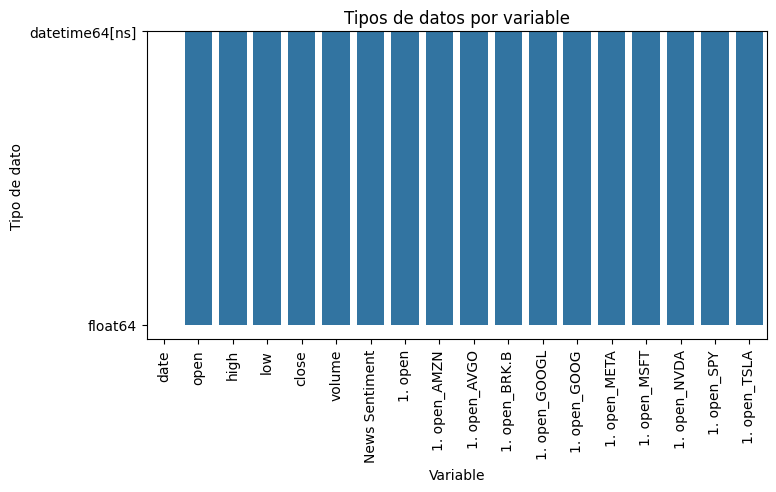

date    open     high      low   close    volume  News Sentiment  \
0 2024-12-31  100.00  100.075  98.4000   98.87  935277.0        0.125853   
1 2024-12-30   98.76  100.680  98.0032   99.68  711003.0        0.107080   
2 2024-12-27   99.96  100.275  98.8200   99.76  663981.0        0.119916   
3 2024-12-26  100.28  100.720  99.7900  100.49  616918.0        0.119932   
4 2024-12-24   99.91  101.210  99.5400  101.06  264320.0        0.126025   

   1. open  1. open_AMZN  1. open_AVGO  1. open_BRK.B  1. open_GOOGL  \
0   252.44       222.965       235.880        452.205        191.075   
1   252.23       220.060       234.695        454.245        189.800   
2   257.83       225.600       245.640        457.300        194.950   
3   258.19       228.500       240.000        457.265        195.150   
4   255.49       226.940       240.115        455.410        194.840   

   1. open_GOOG  1. open_META  1. open_MSFT  1. open_NVDA  1. open_SPY  \
0       192.445       592.265        426.10        138.03      589.905   
1       190.865       588.750        426.06        134.83      587.890   
2       196.470       599.410        434.60        138.55      597.540   
3       196.740       605.480        439.08        139.70      599.500   
4       196.170       602.715        434.65        140.00      596.060   

   1. open_TSLA  
0        423.79  
1        419.40  
2        449.52  
3        465.16  
4        435.90

In [ ]:
import pandas as pd
import os
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los archivos Excel
tsla_file_path = '/content/PLNT_stock_data.csv'
sentiment_file_path = '/content/SENTIMENT.xlsx'

# Cargar los DataFrames
df_tsla = pd.read_csv(tsla_file_path)
df_sentiment = pd.read_excel(sentiment_file_path)

# 'date' estén en formato datetime en ambos DataFrames
df_tsla['date'] = pd.to_datetime(df_tsla['date'])
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Hacer un "VLOOKUP" para agregar el 'News Sentiment' al DataFrame de Tesla
df_tsla = pd.merge(df_tsla, df_sentiment[['date', 'News Sentiment']], on='date', how='left')

# Lista de tickers
tickers = ["AAPL", "AMZN", "AVGO", "BRK.B", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "SPY", "TSLA"]

# Ruta a la carpeta donde están los CSVs
folder_path = '/content/'

# Iterar sobre los tickers y añadir la columna 'open' correspondiente de cada CSV
for ticker in tickers:
    # Crear la ruta del archivo CSV
    file_path = os.path.join(folder_path, f"{ticker}_stock_data.csv")

    # Leer el archivo CSV
    df_ticker = pd.read_csv(file_path)

    # Asegurarse de que la columna 'date' esté en formato datetime
    df_ticker['date'] = pd.to_datetime(df_ticker['date'])

    # Hacer un VLOOKUP para añadir la columna 'open' del ticker correspondiente
    df_tsla = pd.merge(df_tsla, df_ticker[['date', '1. open']], on='date', how='left', suffixes=('', f'_{ticker}'))

# Eliminar la columna 'Ticker' si existe
if 'Ticker' in df_tsla.columns:
    df_tsla = df_tsla.drop('Ticker', axis=1)

# Información básica del DataFrame
num_observations = df_tsla.shape[0]
num_variables = df_tsla.shape[1]
data_types = df_tsla.dtypes.reset_index()
data_types.columns = ['Variable', 'Tipo de Dato']

# Muestra de los datos
sample_data = df_tsla.head()

# Crear una tabla resumen
summary_table = pd.DataFrame({
    'Número de observaciones': [num_observations],
    'Número de variables': [num_variables]
})

# Mostrar la tabla resumen
print("Resumen de los datos:")
display(summary_table)

# Mostrar tipos de datos
print("\nTipos de datos de cada variable:")
display(data_types)

# Mostrar una muestra de datos
print("\nMuestra de los datos:")
display(sample_data)

# Crear gráficos para visualizar información básica
plt.figure(figsize=(8, 4))
sns.barplot(data=data_types, x='Variable', y=[str(dtype) for dtype in data_types['Tipo de Dato']])
plt.title("Tipos de datos por variable")
plt.xlabel("Variable")
plt.ylabel("Tipo de dato")
plt.xticks(rotation=90)
plt.show()

# Mostrar las primeras filas del DataFrame con las nuevas columnas
df_tsla.head()


In [ ]:
# Renombrar la columna 'open' a 'open_APPL'
df_tsla.rename(columns={'1. open': 'open_APPL'}, inplace=True)

# Quitar el prefijo '1. ' de las columnas de las empresas
df_tsla.columns = df_tsla.columns.str.replace('1. ', '', regex=False)

# Mostrar las primeras filas para verificar el cambio
df_tsla.head()

date    open     high      low   close    volume  News Sentiment  \
0 2024-12-31  100.00  100.075  98.4000   98.87  935277.0        0.125853   
1 2024-12-30   98.76  100.680  98.0032   99.68  711003.0        0.107080   
2 2024-12-27   99.96  100.275  98.8200   99.76  663981.0        0.119916   
3 2024-12-26  100.28  100.720  99.7900  100.49  616918.0        0.119932   
4 2024-12-24   99.91  101.210  99.5400  101.06  264320.0        0.126025   

   open_APPL  open_AMZN  open_AVGO  open_BRK.B  open_GOOGL  open_GOOG  \
0     252.44    222.965    235.880     452.205     191.075    192.445   
1     252.23    220.060    234.695     454.245     189.800    190.865   
2     257.83    225.600    245.640     457.300     194.950    196.470   
3     258.19    228.500    240.000     457.265     195.150    196.740   
4     255.49    226.940    240.115     455.410     194.840    196.170   

   open_META  open_MSFT  open_NVDA  open_SPY  open_TSLA  
0    592.265     426.10     138.03   589.905     423.79  
1    588.750     426.06     134.83   587.890     419.40  
2    599.410     434.60     138.55   597.540     449.52  
3    605.480     439.08     139.70   599.500     465.16  
4    602.715     434.65     140.00   596.060     435.90

In [ ]:
# Imprimir los nombres de las columnas
print("Nombres actuales de las columnas:")
print(df_tsla.columns.tolist())

Nombres actuales de las columnas:
['date', 'open', 'high', 'low', 'close', 'volume', 'News Sentiment', 'open_APPL', 'open_AMZN', 'open_AVGO', 'open_BRK.B', 'open_GOOGL', 'open_GOOG', 'open_META', 'open_MSFT', 'open_NVDA', 'open_SPY', 'open_TSLA']


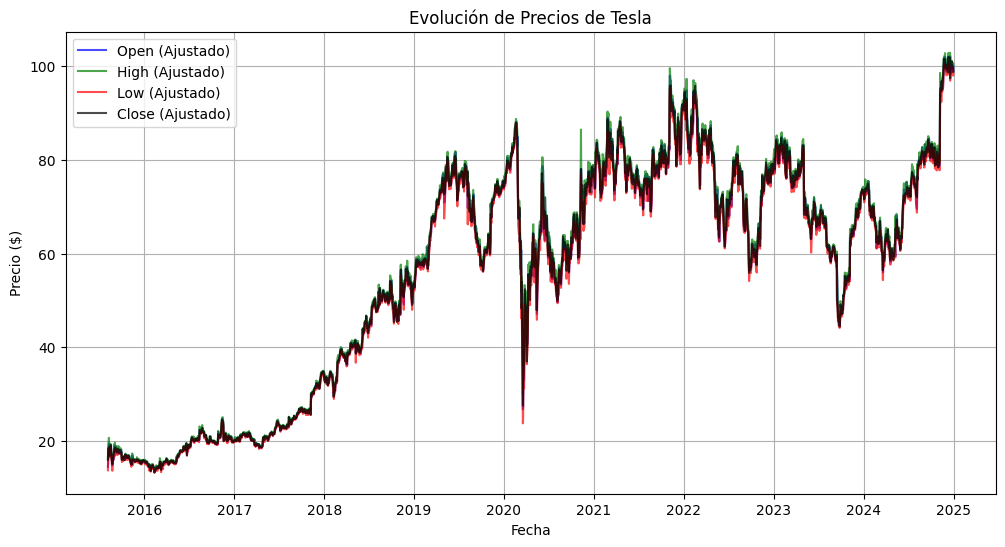

In [ ]:
#GRAFICAMOS PRE SPLIT
# Graficar los precios ajustados
plt.figure(figsize=(12, 6))
plt.plot(df_tsla['date'], df_tsla['open'], label="Open (Ajustado)", color='blue', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['high'], label="High (Ajustado)", color='green', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['low'], label="Low (Ajustado)", color='red', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['close'], label="Close (Ajustado)", color='black', alpha=0.7)

# Configuración del gráfico
plt.title("Evolución de Precios de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True)
plt.show()

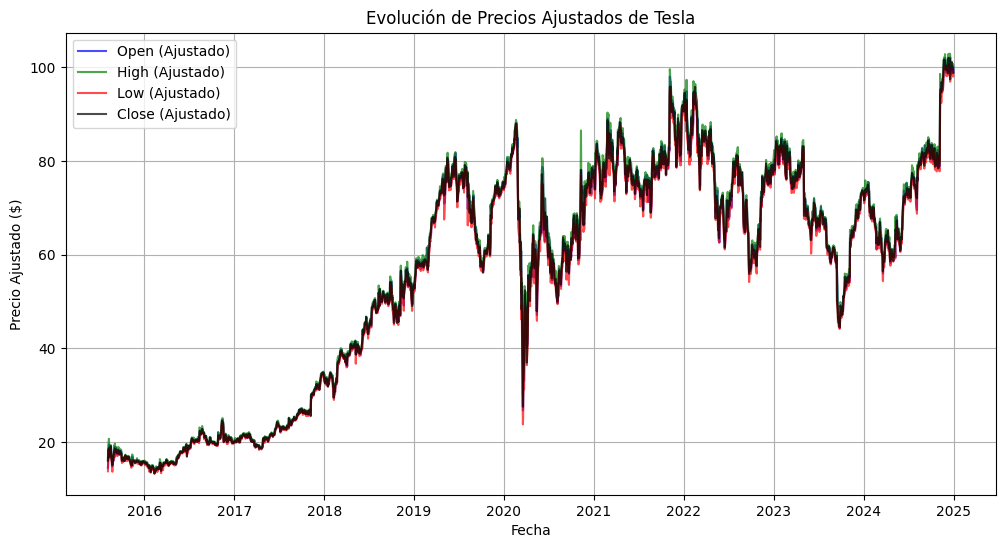

In [ ]:
import matplotlib.pyplot as plt

# Graficar los precios ajustados
plt.figure(figsize=(12, 6))
plt.plot(df_tsla['date'], df_tsla['open'], label="Open (Ajustado)", color='blue', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['high'], label="High (Ajustado)", color='green', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['low'], label="Low (Ajustado)", color='red', alpha=0.7)
plt.plot(df_tsla['date'], df_tsla['close'], label="Close (Ajustado)", color='black', alpha=0.7)

# Configuración del gráfico
plt.title("Evolución de Precios Ajustados de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado ($)")
plt.legend()
plt.grid(True)
plt.show()

# *TRANSFORMACIÓN DE LOS DATOS**

In [ ]:
# Revisión inicial de nulos por columna
initial_nulls = df_tsla.isnull().sum()

# Convertir los resultados a un DataFrame para una visualización más bonita
# Crear la tabla de nulos con el porcentaje formateado
null_table = pd.DataFrame({
    'Columna': initial_nulls.index,
    'Valores Nulos': initial_nulls.values,
    'Porcentaje de Nulos': ((initial_nulls / df_tsla.shape[0]) * 100).round(2).astype(str) + '%'
})



# Mostrar la tabla con un formato bonito
print("Valores nulos por columna (antes de limpieza):")
display(null_table)

Valores nulos por columna (antes de limpieza):


Columna  Valores Nulos Porcentaje de Nulos
date                      date              0                0.0%
open                      open              0                0.0%
high                      high              0                0.0%
low                        low              0                0.0%
close                    close              0                0.0%
volume                  volume              0                0.0%
News Sentiment  News Sentiment              0                0.0%
open_APPL            open_APPL              0                0.0%
open_AMZN            open_AMZN              0                0.0%
open_AVGO            open_AVGO              0                0.0%
open_BRK.B          open_BRK.B              0                0.0%
open_GOOGL          open_GOOGL              0                0.0%
open_GOOG            open_GOOG              0                0.0%
open_META            open_META              0                0.0%
open_MSFT            open_MSFT              0                0.0%
open_NVDA            open_NVDA              0                0.0%
open_SPY              open_SPY              0                0.0%
open_TSLA            open_TSLA              0                0.0%

In [ ]:
# Rellenar los valores nulos con 0
df_tsla = df_tsla.fillna(0)

# Verifica que los nulos han sido reemplazados
print(df_tsla.isnull().sum())

#Explicar que utilizaremos un Masking para que no le den mucho peso las observaciones que tienen 0, que no sognifica mas que no existia la empresa en su momento.

date              0
open              0
high              0
low               0
close             0
volume            0
News Sentiment    0
open_APPL         0
open_AMZN         0
open_AVGO         0
open_BRK.B        0
open_GOOGL        0
open_GOOG         0
open_META         0
open_MSFT         0
open_NVDA         0
open_SPY          0
open_TSLA         0
dtype: int64


In [ ]:
# Asegúrate de que 'date' esté en formato datetime para cálculos basados en tiempo
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

# Ordenar los datos por fecha para cálculos precisos
df_tsla = df_tsla.sort_values(by=['date'])

# Función para calcular indicadores financieros y retornos
def calculate_indicators(df):
    # Ventana de tiempo para cálculos
    window = 14  # Período común para indicadores como RSI y ATR

    # 1. Media Móvil
    df['moving_average'] = df['close'].rolling(window=window).mean()

    # 2. Índice de Fuerza Relativa (RSI)
    delta = df['close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # 3. MACD (Moving Average Convergence Divergence)
    short_window = 12
    long_window = 26
    signal_window = 9
    df['ema_short'] = df['close'].ewm(span=short_window, adjust=False).mean()
    df['ema_long'] = df['close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = df['ema_short'] - df['ema_long']
    df['MACD_signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

    # 4. Bollinger Bands
    df['bollinger_mid'] = df['moving_average']
    df['bollinger_std'] = df['close'].rolling(window=window).std()
    df['bollinger_upper'] = df['bollinger_mid'] + (2 * df['bollinger_std'])
    df['bollinger_lower'] = df['bollinger_mid'] - (2 * df['bollinger_std'])

    # 5. Volatilidad (Desviación Estándar)
    df['volatility'] = df['close'].rolling(window=window).std()

    # 6. Average True Range (ATR)
    df['high_low'] = df['high'] - df['low']  # Corregir 'high ' por 'high'
    df['high_close'] = (df['high'] - df['close'].shift(1)).abs()
    df['low_close'] = (df['low'] - df['close'].shift(1)).abs()
    df['true_range'] = df[['high_low', 'high_close', 'low_close']].max(axis=1)
    df['ATR'] = df['true_range'].rolling(window=window).mean()

    # 7. Retornos (diario, mensual, anual)
    # Retorno diario
    df['daily_return'] = df['close'].pct_change()

    # Retorno mensual: primero calculamos el cierre mensual
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['monthly_return'] = df.groupby(['year', 'month'])['close'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

    # Retorno anual: calculamos el cierre anual
    df['annual_return'] = df.groupby(['year'])['close'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

    # Eliminar columnas intermedias no necesarias
    df.drop(columns=['high_low', 'high_close', 'low_close', 'true_range', 'month'], inplace=True)

    return df

# Calcular los indicadores financieros y los retornos
df_tsla = calculate_indicators(df_tsla)

# Resultado: Una tabla con todas las variables calculadas
print(df_tsla.head(15))  # Muestra las primeras 15 filas con las nuevas variables

           date   open    high      low  close      volume  News Sentiment  \
2366 2015-08-06  14.50  16.180  13.7500  16.00  16172706.0        0.095498   
2365 2015-08-07  16.07  18.450  16.0000  18.25   1844464.0        0.110040   
2364 2015-08-10  19.50  20.680  18.4300  18.68   1088346.0        0.140305   
2363 2015-08-11  18.68  18.763  16.7110  17.38    668562.0        0.138538   
2362 2015-08-12  17.03  17.190  16.5000  16.79    550500.0        0.134209   
2361 2015-08-13  17.05  18.770  17.0000  18.56    466912.0        0.122099   
2360 2015-08-14  18.56  18.900  17.9000  18.78    426055.0        0.114008   
2359 2015-08-17  18.64  19.395  18.3401  19.10    225500.0        0.114599   
2358 2015-08-18  19.19  19.240  18.7800  19.00    211845.0        0.123789   
2357 2015-08-19  18.75  19.000  17.1500  17.79    581382.0        0.102862   
2356 2015-08-20  17.48  17.480  16.5810  16.99    540057.0        0.091180   
2355 2015-08-21  16.52  16.740  16.0100  16.24    513574.0      

In [ ]:
# Rellenar NaN con el primer valor no nulo siguiente (backfill)
df_tsla.fillna(method='bfill', inplace=True)

# Eliminar la columna 'year'
df_tsla = df_tsla.drop(columns=["year"])

print(df_tsla.head(15))

           date   open    high      low  close      volume  News Sentiment  \
2366 2015-08-06  14.50  16.180  13.7500  16.00  16172706.0        0.095498   
2365 2015-08-07  16.07  18.450  16.0000  18.25   1844464.0        0.110040   
2364 2015-08-10  19.50  20.680  18.4300  18.68   1088346.0        0.140305   
2363 2015-08-11  18.68  18.763  16.7110  17.38    668562.0        0.138538   
2362 2015-08-12  17.03  17.190  16.5000  16.79    550500.0        0.134209   
2361 2015-08-13  17.05  18.770  17.0000  18.56    466912.0        0.122099   
2360 2015-08-14  18.56  18.900  17.9000  18.78    426055.0        0.114008   
2359 2015-08-17  18.64  19.395  18.3401  19.10    225500.0        0.114599   
2358 2015-08-18  19.19  19.240  18.7800  19.00    211845.0        0.123789   
2357 2015-08-19  18.75  19.000  17.1500  17.79    581382.0        0.102862   
2356 2015-08-20  17.48  17.480  16.5810  16.99    540057.0        0.091180   
2355 2015-08-21  16.52  16.740  16.0100  16.24    513574.0      

<ipython-input-10-eac4cd9199c3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tsla.fillna(method='bfill', inplace=True)


AQUI MENCIONAR LA PREOCUPACION POR LAS CORRELACIONES DE CARA A LOS NULOS Y LA INTENCION QUE TENEMOS DE HACER MASKING DE LOS 0.

In [ ]:
# Mostrar la cantidad de valores nulos por cada columna
print(df_tsla.isnull().sum())

date               0
open               0
high               0
low                0
close              0
volume             0
News Sentiment     0
open_APPL          0
open_AMZN          0
open_AVGO          0
open_BRK.B         0
open_GOOGL         0
open_GOOG          0
open_META          0
open_MSFT          0
open_NVDA          0
open_SPY           0
open_TSLA          0
moving_average     0
RSI                0
ema_short          0
ema_long           0
MACD               0
MACD_signal        0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
volatility         0
ATR                0
daily_return       0
monthly_return     0
annual_return      0
dtype: int64


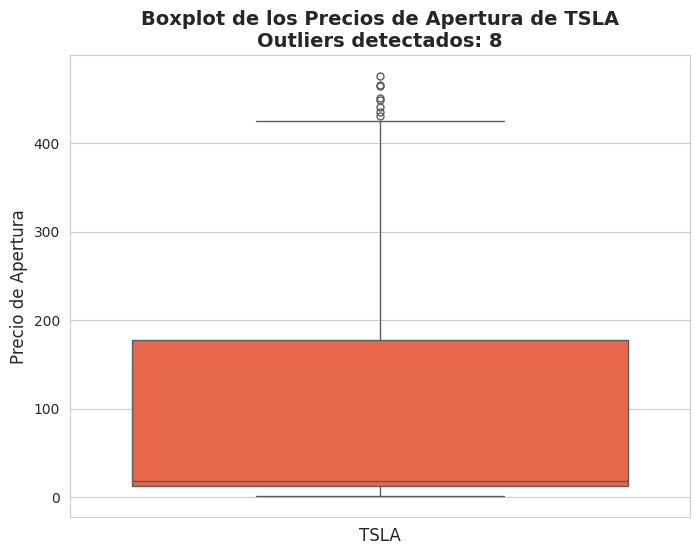

Valores atípicos detectados en TSLA: 8

🔹 Justificación para mantener los outliers:
En una serie financiera, los outliers no representan errores, sino eventos significativos como anuncios de ganancias, crisis económicas o cambios de tendencia. Eliminar estos datos podría ocultar información valiosa sobre la volatilidad y la dinámica real del mercado, afectando la calidad de los modelos predictivos.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo la columna de apertura
df_tsla_open = df_tsla[['open']].copy()

# Cálculo del rango intercuartil (IQR) para detectar outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inf = Q1 - 1.5 * IQR
    umbral_sup = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < umbral_inf) | (df[columna] > umbral_sup)]
    return outliers, len(outliers)

outliers_tsla, num_outliers_tsla = detectar_outliers(df_tsla_open, 'open')

# Configuración de estilo para gráficos más atractivos
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Crear boxplot con colores personalizados y resaltando outliers en rojo
sns.boxplot(
    data=df_tsla_open,
    y='open',
    color="#FF5733",
    flierprops=dict(marker='o', color='red', markersize=5)  # Outliers en rojo
)

# Etiquetas y título
plt.xticks([0], ['TSLA'], fontsize=12)
plt.ylabel("Precio de Apertura", fontsize=12)
plt.title(f"Boxplot de los Precios de Apertura de TSLA\nOutliers detectados: {num_outliers_tsla}",
          fontsize=14, fontweight='bold')

# Mostrar gráfico
plt.show()

# Justificación para mantener los outliers
print(f"Valores atípicos detectados en TSLA: {num_outliers_tsla}")
print("\n🔹 Justificación para mantener los outliers:")
print("En una serie financiera, los outliers no representan errores, sino eventos significativos como anuncios de ganancias, crisis económicas o cambios de tendencia. "
      "Eliminar estos datos podría ocultar información valiosa sobre la volatilidad y la dinámica real del mercado, afectando la calidad de los modelos predictivos.")

# **ANÁLISIS DESCRIPTIVO **

In [ ]:
# Restablecer el índice para evitar conflictos
df_tsla = df_tsla.reset_index(drop=True)

# Resumen estadístico de las variables numéricas
summary = df_tsla.describe()

# Imprimir un resumen bonito con formato
print(summary.to_string(float_format='{:,.2f}'.format))

# Restablecer el índice para evitar conflictos
df_tsla = df_tsla.reset_index(drop=True)

# Resumen estadístico de las variables numéricas
summary = df_tsla.describe()

# Imprimir un resumen bonito con formato
print(summary.to_string(float_format='{:,.2f}'.format))

import pandas as pd

# Seleccionar las columnas de interés
columns_of_interest = ["open", "News Sentiment", "open_APPL", "open_MSFT", "ATR"]

# Generar el resumen estadístico solo para estas variables
summary = df_tsla[columns_of_interest].describe().T  # Transponer para mejor visualización

# Formatear los valores a dos decimales y añadir títulos personalizados
summary = summary.rename(columns={
    "count": "Cantidad",
    "mean": "Media",
    "std": "Desviación Estándar",
    "min": "Mínimo",
    "25%": "Percentil 25",
    "50%": "Mediana",
    "75%": "Percentil 75",
    "max": "Máximo"
})

# Formatear la tabla con estilo
styled_summary = summary.style.set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("background-color", "#004488"), ("color", "white"), ("text-align", "center")]},
    {"selector": "td", "props": [("font-size", "11pt"), ("text-align", "center")]}
]).format("{:.2f}")  # Limitar a dos decimales

# Mostrar la tabla
display(styled_summary)

                                date     open     high      low    close         volume  News Sentiment  open_APPL  open_AMZN  open_AVGO  open_BRK.B  open_GOOGL  open_GOOG  open_META  open_MSFT  open_NVDA  open_SPY  moving_average      RSI  ema_short  ema_long     MACD  MACD_signal  bollinger_mid  bollinger_std  bollinger_upper  bollinger_lower  volatility      ATR  daily_return  monthly_return  annual_return
count                           3652 3,652.00 3,652.00 3,652.00 3,652.00       3,652.00        3,652.00   3,652.00   3,652.00   3,652.00    3,652.00    3,652.00   3,652.00   3,652.00   3,652.00   3,652.00  3,652.00        3,652.00 3,652.00   3,652.00  3,652.00 3,652.00     3,652.00       3,652.00       3,652.00         3,652.00         3,652.00    3,652.00 3,652.00      3,652.00        3,652.00       3,652.00
mean   2017-09-28 09:20:42.059145728   302.75   309.33   295.84   302.81  26,924,668.56           -0.03     245.35     988.00     287.06      196.93      920.81     735.22   

In [ ]:
# Análisis descriptivo de las variables
summary = df_tsla.describe()

# Imprimir el resumen estadístico de las variables numéricas
print("Análisis Descriptivo de las Variables:")
print(summary.to_string(float_format='{:,.2f}'.format))

# Identificar algunas observaciones clave
print("\nObservaciones clave sobre las variables:")
print(f"1. Media Móvil (Moving Average): Promedio de los precios de cierre a lo largo de 14 días.")
print(f"2. RSI: Mide la sobrecompra o sobreventa del activo (valores entre 0 y 100).")
print(f"3. MACD: Indicador de tendencia, muestra convergencia/divergencia de medias móviles.")
print(f"4. Bollinger Bands: La desviación estándar muestra la volatilidad y las bandas de sobrecompra y sobreventa.")
print(f"5. Retornos: Diario, mensual y anual muestran la variación del precio.")
print(f"6. Sentimiento: Muestra la polaridad de las noticias (positivo o negativo).")

Análisis Descriptivo de las Variables:
                                date     open     high      low    close         volume  News Sentiment  open_APPL  open_AMZN  open_AVGO  open_BRK.B  open_GOOGL  open_GOOG  open_META  open_MSFT  open_NVDA  open_SPY  moving_average      RSI  ema_short  ema_long     MACD  MACD_signal  bollinger_mid  bollinger_std  bollinger_upper  bollinger_lower  volatility      ATR  daily_return  monthly_return  annual_return
count                           3652 3,652.00 3,652.00 3,652.00 3,652.00       3,652.00        3,652.00   3,652.00   3,652.00   3,652.00    3,652.00    3,652.00   3,652.00   3,652.00   3,652.00   3,652.00  3,652.00        3,652.00 3,652.00   3,652.00  3,652.00 3,652.00     3,652.00       3,652.00       3,652.00         3,652.00         3,652.00    3,652.00 3,652.00      3,652.00        3,652.00       3,652.00
mean   2017-09-28 09:20:42.059145728   302.75   309.33   295.84   302.81  26,924,668.56           -0.03     245.35     988.00     287.0

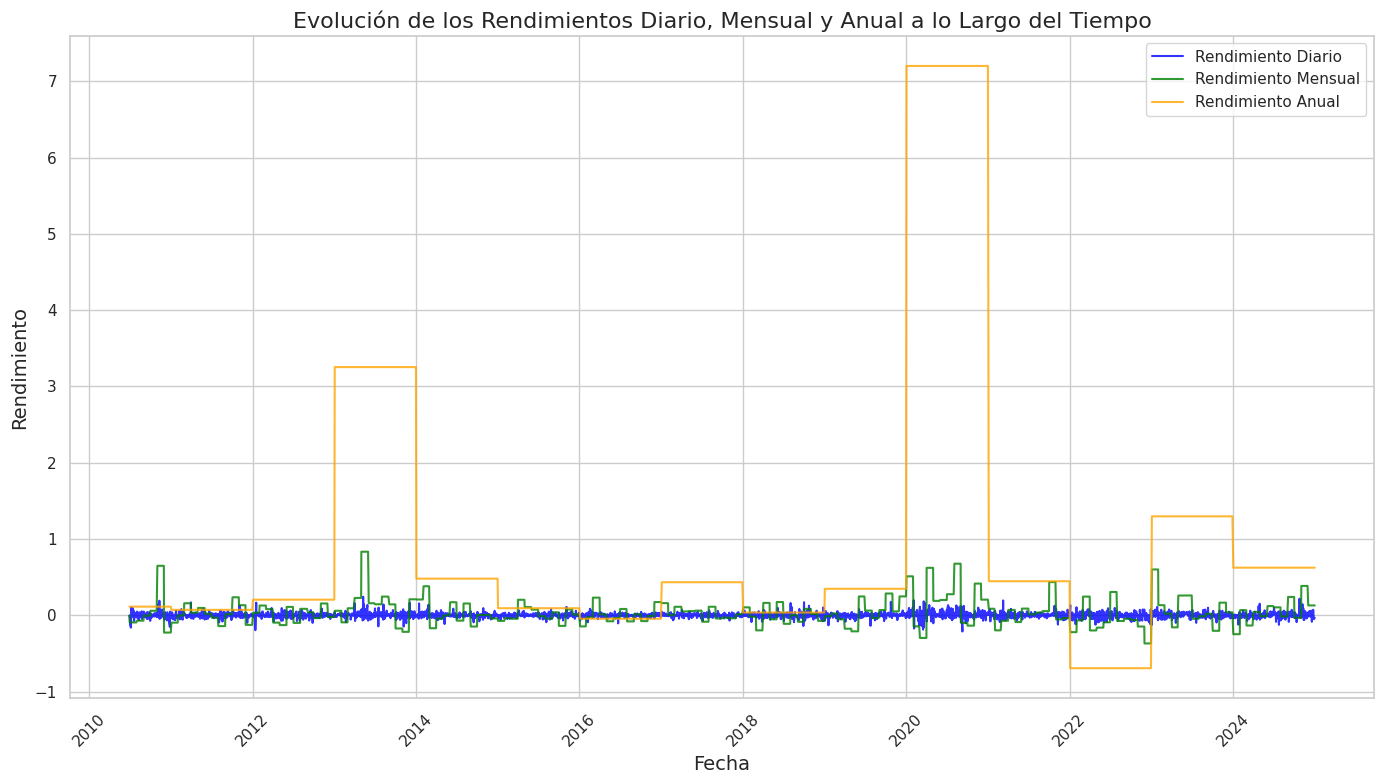

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo visual bonito
sns.set(style="whitegrid")

# Crear la figura y el eje para la gráfica
plt.figure(figsize=(14, 8))

# Graficar los tres rendimientos
plt.plot(df_tsla['date'], df_tsla['daily_return'], label='Rendimiento Diario', color='blue', alpha=0.8)
plt.plot(df_tsla['date'], df_tsla['monthly_return'], label='Rendimiento Mensual', color='green', alpha=0.8)
plt.plot(df_tsla['date'], df_tsla['annual_return'], label='Rendimiento Anual', color='orange', alpha=0.8)

# Títulos y etiquetas
plt.title('Evolución de los Rendimientos Diario, Mensual y Anual a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Rendimiento', fontsize=14)
plt.legend()

# Mejorar la visualización de la fecha
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
print(df_tsla.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'News Sentiment',
       'open_APPL', 'open_AMZN', 'open_AVGO', 'open_BRK.B', 'open_GOOGL',
       'open_GOOG', 'open_META', 'open_MSFT', 'open_NVDA', 'open_SPY',
       'moving_average', 'RSI', 'ema_short', 'ema_long', 'MACD', 'MACD_signal',
       'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower',
       'volatility', 'ATR', 'daily_return', 'monthly_return', 'annual_return'],
      dtype='object')


Correlaciones entre el precio de apertura de Tesla y las empresas:


Correlación        P-valor
date                0.798209   0.000000e+00
high                0.999719   0.000000e+00
low                 0.999623   0.000000e+00
close               0.999208   0.000000e+00
volume              0.634870   0.000000e+00
News Sentiment     -0.026637   1.075225e-01
open_APPL          -0.337961   2.900967e-98
open_AMZN           0.342981  2.463488e-101
open_AVGO           0.682225   0.000000e+00
open_BRK.B          0.838964   0.000000e+00
open_GOOGL          0.278558   4.540064e-66
open_GOOG           0.410479  1.827542e-148
open_META           0.752843   0.000000e+00
open_MSFT           0.897332   0.000000e+00
open_NVDA           0.577574   0.000000e+00
open_SPY            0.880550   0.000000e+00
moving_average      0.995480   0.000000e+00
RSI                 0.034159   3.900037e-02
ema_short           0.997424   0.000000e+00
ema_long            0.993072   0.000000e+00
MACD                0.278683   3.949790e-66
MACD_signal         0.283792   1.304676e-68
bollinger_mid       0.995480   0.000000e+00
bollinger_std       0.863307   0.000000e+00
bollinger_upper     0.995339   0.000000e+00
bollinger_lower     0.990248   0.000000e+00
volatility          0.863307   0.000000e+00
ATR                 0.945990   0.000000e+00
daily_return       -0.006372   7.003010e-01
monthly_return     -0.025453   1.240817e-01
annual_return      -0.008872   5.919917e-01


Correlaciones significativas (p-valor < 0.05):


Correlación        P-valor
date                0.798209   0.000000e+00
high                0.999719   0.000000e+00
low                 0.999623   0.000000e+00
close               0.999208   0.000000e+00
volume              0.634870   0.000000e+00
open_APPL          -0.337961   2.900967e-98
open_AMZN           0.342981  2.463488e-101
open_AVGO           0.682225   0.000000e+00
open_BRK.B          0.838964   0.000000e+00
open_GOOGL          0.278558   4.540064e-66
open_GOOG           0.410479  1.827542e-148
open_META           0.752843   0.000000e+00
open_MSFT           0.897332   0.000000e+00
open_NVDA           0.577574   0.000000e+00
open_SPY            0.880550   0.000000e+00
moving_average      0.995480   0.000000e+00
RSI                 0.034159   3.900037e-02
ema_short           0.997424   0.000000e+00
ema_long            0.993072   0.000000e+00
MACD                0.278683   3.949790e-66
MACD_signal         0.283792   1.304676e-68
bollinger_mid       0.995480   0.000000e+00
bollinger_std       0.863307   0.000000e+00
bollinger_upper     0.995339   0.000000e+00
bollinger_lower     0.990248   0.000000e+00
volatility          0.863307   0.000000e+00
ATR                 0.945990   0.000000e+00


Correlaciones no significativas (p-valor >= 0.05):


Correlación   P-valor
News Sentiment    -0.026637  0.107523
daily_return      -0.006372  0.700301
monthly_return    -0.025453  0.124082
annual_return     -0.008872  0.591992

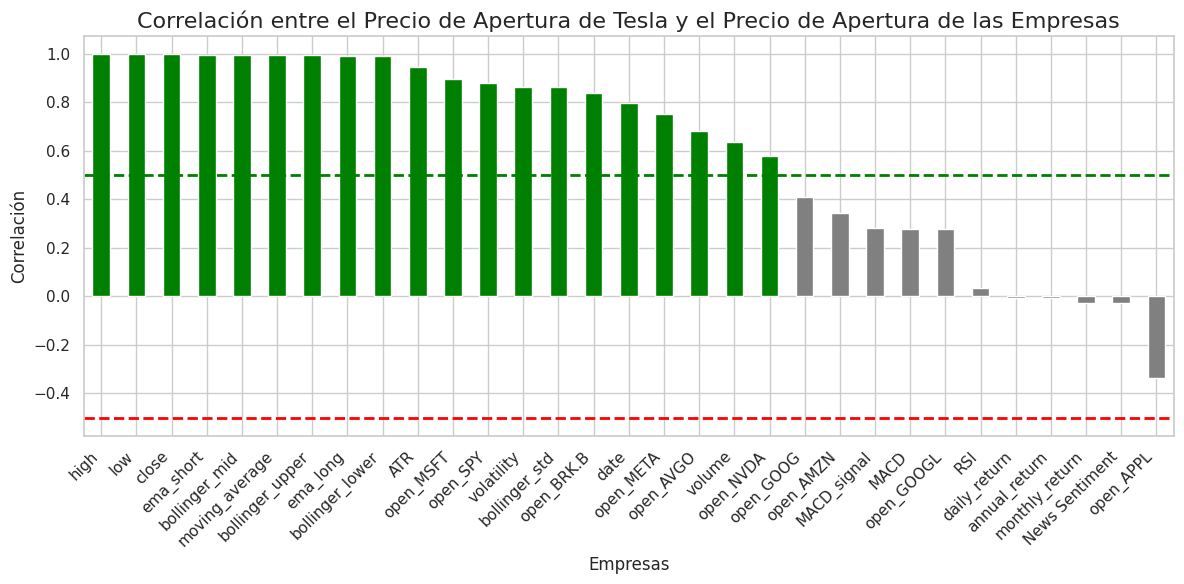

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# Asegúrate de que 'open' y las otras columnas sean numéricas
df_tsla['open'] = pd.to_numeric(df_tsla['open'], errors='coerce')

# Calcular la correlación entre todas las columnas
correlation = df_tsla.corr()

# Extraer la correlación con 'open' de Tesla
tsla_correlation = correlation['open'].drop('open')  # Eliminamos la correlación de 'open' consigo mismo

# Inicializar listas para correlaciones y p-valores
correlations = []
p_values = []

# Calcular el p-valor para cada correlación
for col in tsla_correlation.index:
    df_tsla[col] = pd.to_numeric(df_tsla[col], errors='coerce')  # Asegurarse de que cada columna es numérica
    corr, p_val = pearsonr(df_tsla['open'], df_tsla[col])
    correlations.append(corr)
    p_values.append(p_val)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Correlación': correlations,
    'P-valor': p_values
}, index=tsla_correlation.index)

# Filtrar las correlaciones significativas (p-valor < 0.05)
significant = results_df[results_df['P-valor'] < 0.05]
non_significant = results_df[results_df['P-valor'] >= 0.05]

# Mostrar la tabla con todas las correlaciones
print("Correlaciones entre el precio de apertura de Tesla y las empresas:")
display(results_df)

# Mostrar las tablas de correlaciones significativas y no significativas
print("\nCorrelaciones significativas (p-valor < 0.05):")
display(significant)

print("\nCorrelaciones no significativas (p-valor >= 0.05):")
display(non_significant)

# Ordenar la serie de correlaciones de mayor a menor
tsla_correlation_sorted = tsla_correlation.sort_values(ascending=False)

# Graficar la correlación
plt.figure(figsize=(12, 6))

# Establecer colores para las barras
colors = ['green' if x > 0.5 else 'red' if x <= -0.5 else 'gray' for x in tsla_correlation_sorted]

# Graficar las barras con los colores adecuados
ax = tsla_correlation_sorted.plot(kind='bar', color=colors)

# Añadir líneas horizontales a 0.5 y -0.5
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2)
plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=2)

# Títulos y etiquetas
plt.title('Correlación entre el Precio de Apertura de Tesla y el Precio de Apertura de las Empresas', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)

# Ajustar las etiquetas del eje X para evitar que se solapen
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para que todo encaje bien
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Correlaciones entre el Precio de Apertura de Tesla y las Empresas:


Correlación        P-valor
date                0.536626  1.595159e-271
high                0.999461   0.000000e+00
low                 0.999326   0.000000e+00
close               0.998679   0.000000e+00
volume              0.041985   1.116490e-02
News Sentiment     -0.168273   1.330914e-24
open_APPL          -0.286554   5.651388e-70
open_AMZN           0.777863   0.000000e+00
open_AVGO           0.310846   1.218767e-82
open_BRK.B          0.400269  1.331488e-140
open_GOOGL          0.703392   0.000000e+00
open_GOOG           0.791996   0.000000e+00
open_META           0.456790  9.458159e-188
open_MSFT           0.458065  6.393578e-189
open_NVDA           0.453652  6.842666e-185
open_SPY            0.510174  2.904283e-241
moving_average      0.969861   0.000000e+00
RSI                 0.138359   4.509280e-17
ema_short           0.982750   0.000000e+00
ema_long            0.963381   0.000000e+00
MACD                0.312706   1.162840e-83
MACD_signal         0.311494   5.388975e-83
bollinger_mid       0.969861   0.000000e+00
bollinger_std       0.394118  5.357610e-136
bollinger_upper     0.901724   0.000000e+00
bollinger_lower     0.956850   0.000000e+00
volatility          0.394118  5.357610e-136
ATR                 0.757005   0.000000e+00
daily_return        0.019756   2.326424e-01
monthly_return     -0.116238   1.841510e-12
annual_return      -0.197886   1.447665e-33


Correlaciones significativas (p-valor < 0.05) con el precio de apertura de Tesla:


Correlación        P-valor
date                0.536626  1.595159e-271
high                0.999461   0.000000e+00
low                 0.999326   0.000000e+00
close               0.998679   0.000000e+00
volume              0.041985   1.116490e-02
News Sentiment     -0.168273   1.330914e-24
open_APPL          -0.286554   5.651388e-70
open_AMZN           0.777863   0.000000e+00
open_AVGO           0.310846   1.218767e-82
open_BRK.B          0.400269  1.331488e-140
open_GOOGL          0.703392   0.000000e+00
open_GOOG           0.791996   0.000000e+00
open_META           0.456790  9.458159e-188
open_MSFT           0.458065  6.393578e-189
open_NVDA           0.453652  6.842666e-185
open_SPY            0.510174  2.904283e-241
moving_average      0.969861   0.000000e+00
RSI                 0.138359   4.509280e-17
ema_short           0.982750   0.000000e+00
ema_long            0.963381   0.000000e+00
MACD                0.312706   1.162840e-83
MACD_signal         0.311494   5.388975e-83
bollinger_mid       0.969861   0.000000e+00
bollinger_std       0.394118  5.357610e-136
bollinger_upper     0.901724   0.000000e+00
bollinger_lower     0.956850   0.000000e+00
volatility          0.394118  5.357610e-136
ATR                 0.757005   0.000000e+00
monthly_return     -0.116238   1.841510e-12
annual_return      -0.197886   1.447665e-33


Correlaciones no significativas (p-valor >= 0.05) con el precio de apertura de Tesla:


Correlación   P-valor
daily_return     0.019756  0.232642


Correlaciones entre el Sentimiento de Noticias de Tesla y las Empresas:


Correlación       P-valor
date                0.042596  1.004043e-02
open               -0.168273  1.330914e-24
high               -0.171904  1.278809e-25
low                -0.164816  1.179741e-23
close              -0.169106  7.811076e-25
volume             -0.050374  2.326130e-03
open_APPL          -0.269541  8.057773e-62
open_AMZN          -0.128645  5.995997e-15
open_AVGO           0.036684  2.663304e-02
open_BRK.B          0.135227  2.268871e-16
open_GOOGL         -0.050939  2.074818e-03
open_GOOG           0.017499  2.904004e-01
open_META           0.169585  5.744128e-25
open_MSFT          -0.016606  3.157259e-01
open_NVDA          -0.030789  6.282078e-02
open_SPY            0.096912  4.400216e-09
moving_average     -0.169194  7.381606e-25
RSI                 0.004499  7.857675e-01
ema_short          -0.170377  3.446113e-25
ema_long           -0.172476  8.801874e-26
MACD               -0.009548  5.640794e-01
MACD_signal        -0.009348  5.722571e-01
bollinger_mid      -0.169194  7.381606e-25
bollinger_std      -0.205884  2.986544e-36
bollinger_upper    -0.198204  1.137742e-33
bollinger_lower    -0.108226  5.478892e-11
volatility         -0.205884  2.986544e-36
ATR                -0.287904  1.203028e-70
daily_return       -0.014859  3.693326e-01
monthly_return     -0.022721  1.698264e-01
annual_return       0.021504  1.938558e-01


Correlaciones significativas (p-valor < 0.05) con el Sentimiento de Noticias de Tesla:


Correlación       P-valor
date                0.042596  1.004043e-02
open               -0.168273  1.330914e-24
high               -0.171904  1.278809e-25
low                -0.164816  1.179741e-23
close              -0.169106  7.811076e-25
volume             -0.050374  2.326130e-03
open_APPL          -0.269541  8.057773e-62
open_AMZN          -0.128645  5.995997e-15
open_AVGO           0.036684  2.663304e-02
open_BRK.B          0.135227  2.268871e-16
open_GOOGL         -0.050939  2.074818e-03
open_META           0.169585  5.744128e-25
open_SPY            0.096912  4.400216e-09
moving_average     -0.169194  7.381606e-25
ema_short          -0.170377  3.446113e-25
ema_long           -0.172476  8.801874e-26
bollinger_mid      -0.169194  7.381606e-25
bollinger_std      -0.205884  2.986544e-36
bollinger_upper    -0.198204  1.137742e-33
bollinger_lower    -0.108226  5.478892e-11
volatility         -0.205884  2.986544e-36
ATR                -0.287904  1.203028e-70


Correlaciones no significativas (p-valor >= 0.05) con el Sentimiento de Noticias de Tesla:


Correlación   P-valor
open_GOOG          0.017499  0.290400
open_MSFT         -0.016606  0.315726
open_NVDA         -0.030789  0.062821
RSI                0.004499  0.785768
MACD              -0.009548  0.564079
MACD_signal       -0.009348  0.572257
daily_return      -0.014859  0.369333
monthly_return    -0.022721  0.169826
annual_return      0.021504  0.193856

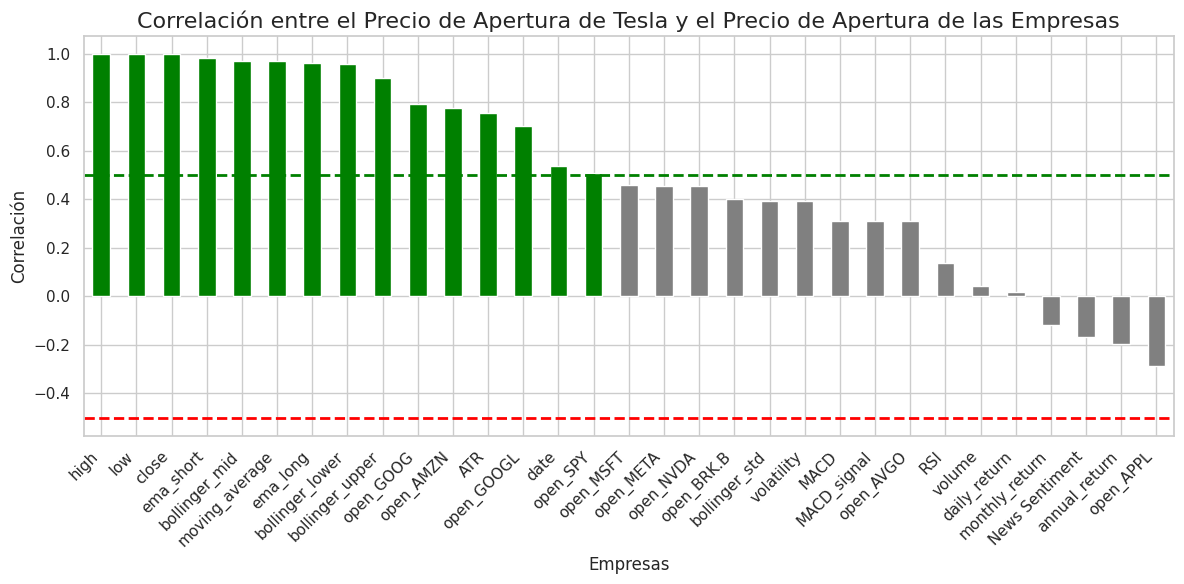

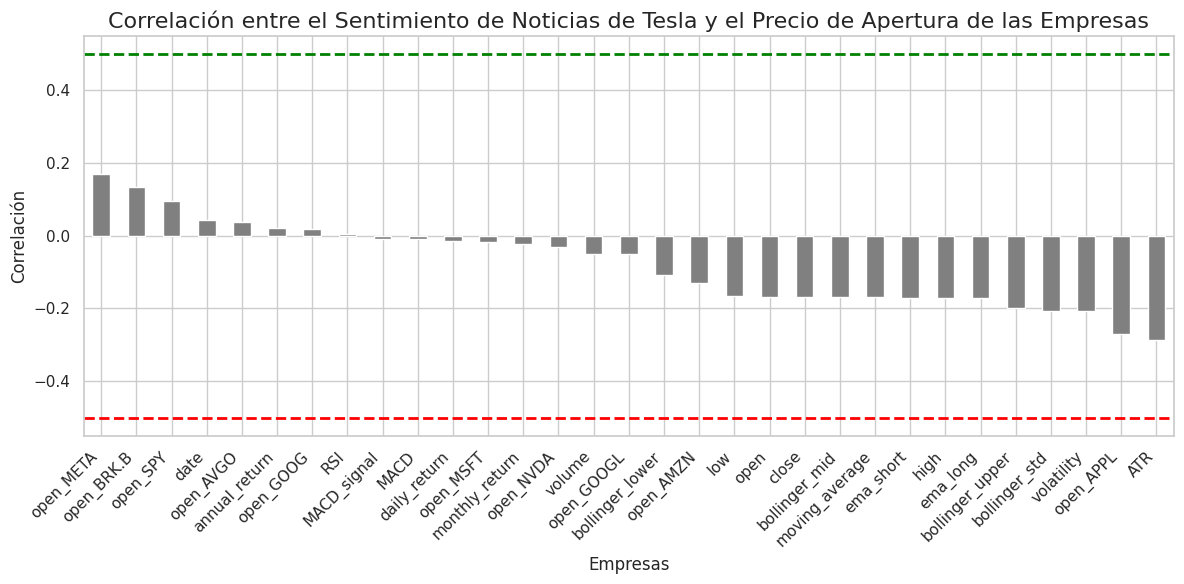

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# Asegúrate de que 'open' y 'sentiment' sean numéricas
df_tsla['open'] = pd.to_numeric(df_tsla['open'], errors='coerce')
df_tsla['News Sentiment'] = pd.to_numeric(df_tsla['News Sentiment'], errors='coerce')

# Calcular la correlación entre todas las columnas
correlation = df_tsla.corr()

# Correlación con 'open' (precio de apertura de Tesla)
tsla_correlation_open = correlation['open'].drop('open')  # Eliminamos la correlación de 'open' consigo mismo

# Correlación con 'News Sentiment' (sentimiento de noticias)
tsla_correlation_sentiment = correlation['News Sentiment'].drop('News Sentiment')  # Eliminamos la correlación de 'sentiment' consigo mismo

# Inicializar listas para las correlaciones y p-valores
correlations_open = []
p_values_open = []
correlations_sentiment = []
p_values_sentiment = []

# Calcular el p-valor para cada correlación con 'open' y 'sentiment'
for col in tsla_correlation_open.index:
    df_tsla[col] = pd.to_numeric(df_tsla[col], errors='coerce')  # Asegurarse de que cada columna sea numérica
    corr_open, p_val_open = pearsonr(df_tsla['open'], df_tsla[col])
    correlations_open.append(corr_open)
    p_values_open.append(p_val_open)

for col in tsla_correlation_sentiment.index:
    df_tsla[col] = pd.to_numeric(df_tsla[col], errors='coerce')  # Asegurarse de que cada columna sea numérica
    corr_sentiment, p_val_sentiment = pearsonr(df_tsla['News Sentiment'], df_tsla[col])
    correlations_sentiment.append(corr_sentiment)
    p_values_sentiment.append(p_val_sentiment)

# Crear un DataFrame con los resultados de la correlación con 'open'
results_open_df = pd.DataFrame({
    'Correlación': correlations_open,
    'P-valor': p_values_open
}, index=tsla_correlation_open.index)

# Crear un DataFrame con los resultados de la correlación con 'News Sentiment'
results_sentiment_df = pd.DataFrame({
    'Correlación': correlations_sentiment,
    'P-valor': p_values_sentiment
}, index=tsla_correlation_sentiment.index)

# Filtrar las correlaciones significativas (p-valor < 0.05) para ambas
significant_open = results_open_df[results_open_df['P-valor'] < 0.05]
non_significant_open = results_open_df[results_open_df['P-valor'] >= 0.05]

significant_sentiment = results_sentiment_df[results_sentiment_df['P-valor'] < 0.05]
non_significant_sentiment = results_sentiment_df[results_sentiment_df['P-valor'] >= 0.05]

# Mostrar la tabla con todas las correlaciones con 'open'
print("Correlaciones entre el Precio de Apertura de Tesla y las Empresas:")
display(results_open_df)

# Mostrar las tablas de correlaciones significativas y no significativas con 'open'
print("\nCorrelaciones significativas (p-valor < 0.05) con el precio de apertura de Tesla:")
display(significant_open)

print("\nCorrelaciones no significativas (p-valor >= 0.05) con el precio de apertura de Tesla:")
display(non_significant_open)

# Mostrar la tabla con todas las correlaciones con 'News Sentiment'
print("\nCorrelaciones entre el Sentimiento de Noticias de Tesla y las Empresas:")
display(results_sentiment_df)

# Mostrar las tablas de correlaciones significativas y no significativas con 'News Sentiment'
print("\nCorrelaciones significativas (p-valor < 0.05) con el Sentimiento de Noticias de Tesla:")
display(significant_sentiment)

print("\nCorrelaciones no significativas (p-valor >= 0.05) con el Sentimiento de Noticias de Tesla:")
display(non_significant_sentiment)

# Ordenar las series de correlaciones de mayor a menor para las gráficas
tsla_correlation_open_sorted = tsla_correlation_open.sort_values(ascending=False)
tsla_correlation_sentiment_sorted = tsla_correlation_sentiment.sort_values(ascending=False)

# Graficar la correlación con el precio de apertura de Tesla
plt.figure(figsize=(12, 6))

# Establecer colores para las barras (precio de apertura)
colors_open = ['green' if x > 0.5 else 'red' if x <= -0.5 else 'gray' for x in tsla_correlation_open_sorted]

# Graficar las barras con los colores adecuados
ax_open = tsla_correlation_open_sorted.plot(kind='bar', color=colors_open)

# Añadir líneas horizontales a 0.5 y -0.5
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2)
plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=2)

# Títulos y etiquetas
plt.title('Correlación entre el Precio de Apertura de Tesla y el Precio de Apertura de las Empresas', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)

# Ajustar las etiquetas del eje X para evitar que se solapen
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para que todo encaje bien
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Graficar la correlación con el Sentimiento de Noticias de Tesla
plt.figure(figsize=(12, 6))

# Establecer colores para las barras (sentimiento)
colors_sentiment = ['green' if x > 0.5 else 'red' if x <= -0.5 else 'gray' for x in tsla_correlation_sentiment_sorted]

# Graficar las barras con los colores adecuados
ax_sentiment = tsla_correlation_sentiment_sorted.plot(kind='bar', color=colors_sentiment)

# Añadir líneas horizontales a 0.5 y -0.5
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2)
plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=2)

# Títulos y etiquetas
plt.title('Correlación entre el Sentimiento de Noticias de Tesla y el Precio de Apertura de las Empresas', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Correlación', fontsize=12)

# Ajustar las etiquetas del eje X para evitar que se solapen
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para que todo encaje bien
plt.tight_layout()

# Mostrar la gráfica
plt.show()

AQUI MENCIONAR LO INTERESANTE DEL BERKSHIRE HATHAWAY... WOW


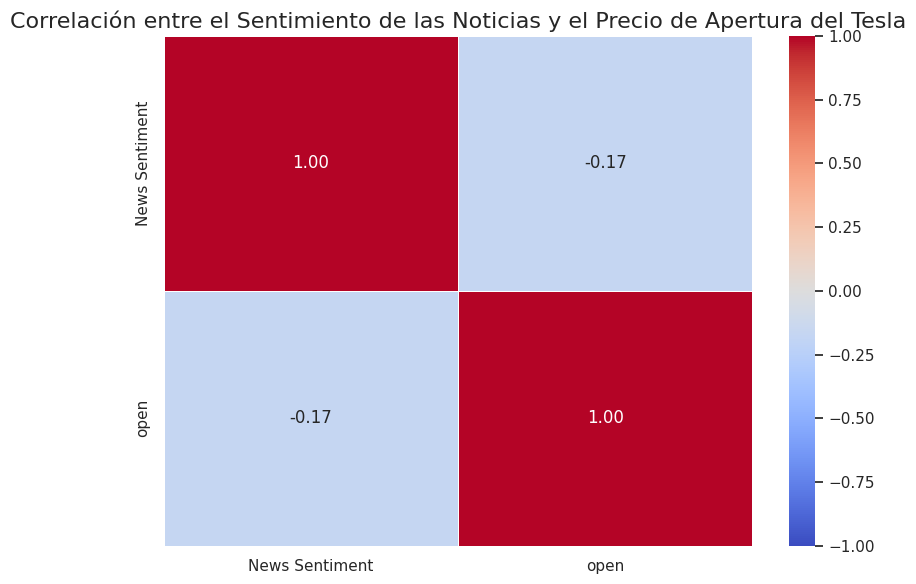

In [ ]:
# Calcular la correlación entre 'News Sentiment' y 'open' del SPY
sentiment_correlation = df_tsla[['News Sentiment', 'open']].corr()

# Crear la figura para la gráfica de correlación
plt.figure(figsize=(8, 6))

# Crear un heatmap de la correlación
sns.heatmap(sentiment_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            linewidths=0.5, vmin=-1, vmax=1)

# Título y etiquetas
plt.title('Correlación entre el Sentimiento de las Noticias y el Precio de Apertura del Tesla', fontsize=16)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

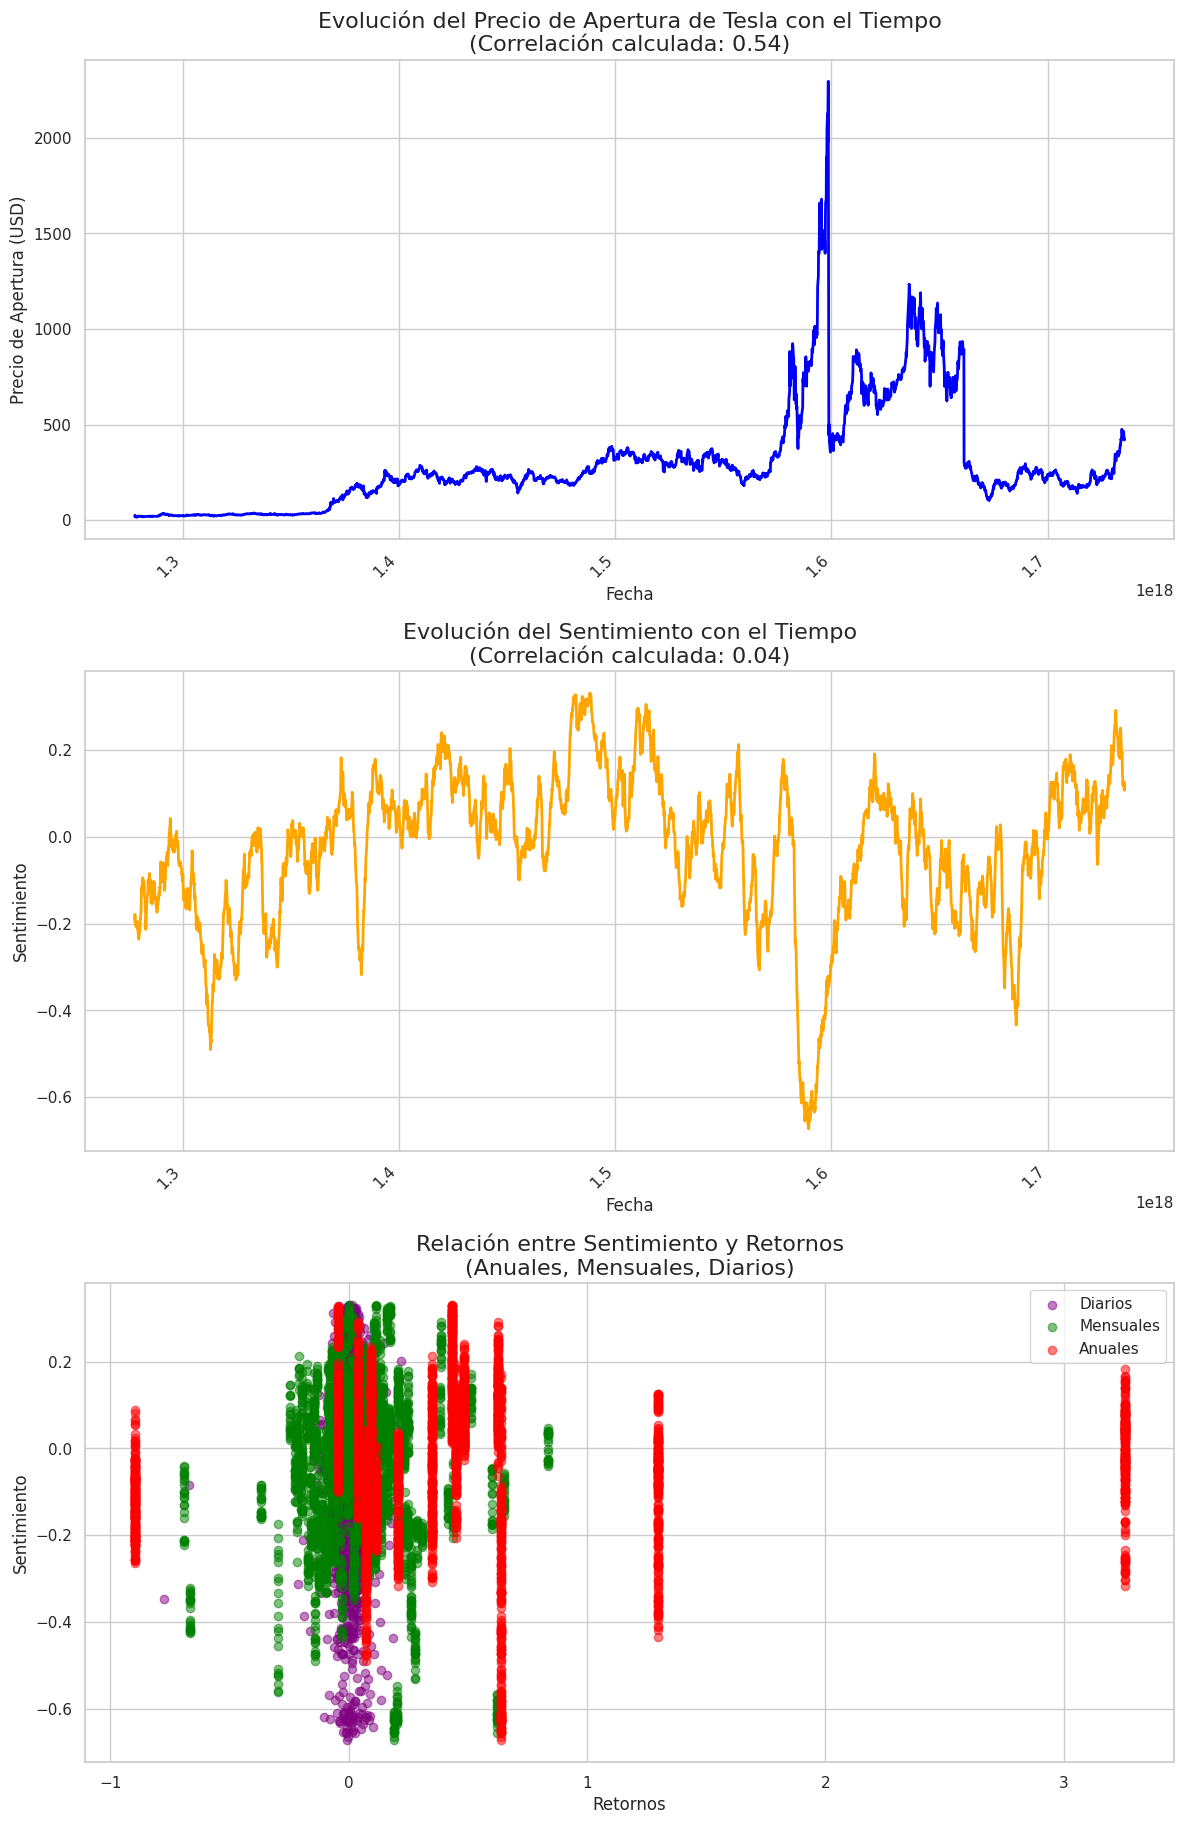

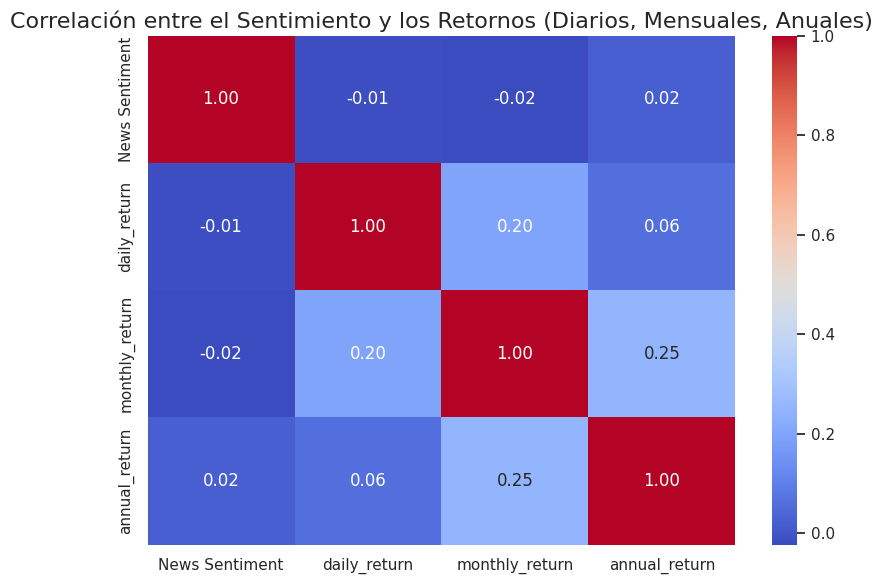

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las correlaciones de sentimiento con los retornos (diario, mensual, anual)
sentiment_daily_return_corr = df_tsla['News Sentiment'].corr(df_tsla['daily_return'])
sentiment_monthly_return_corr = df_tsla['News Sentiment'].corr(df_tsla['monthly_return'])
sentiment_annual_return_corr = df_tsla['News Sentiment'].corr(df_tsla['annual_return'])
tsla_time_corr = df_tsla['open'].corr(df_tsla['date'])
sent_time_corr = df_tsla['News Sentiment'].corr(df_tsla['date'])

# Graficar
plt.figure(figsize=(12, 24))

# 1. Evolución del precio de apertura de Tesla con el tiempo
plt.subplot(4, 1, 1)
plt.plot(df_tsla['date'], df_tsla['open'], color='blue', label='Precio de Apertura de Tesla', linewidth=2)

# Títulos y etiquetas
plt.title(f'Evolución del Precio de Apertura de Tesla con el Tiempo\n(Correlación calculada: {tsla_time_corr:.2f})', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Apertura (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 2. Evolución del Sentimiento con el tiempo y su correlación con los retornos
plt.subplot(4, 1, 2)
plt.plot(df_tsla['date'], df_tsla['News Sentiment'], color='orange', label='Sentimiento de Noticias', linewidth=2)

# Títulos y etiquetas con la correlación de Sentimiento con los Retornos Diarios
plt.title(f'Evolución del Sentimiento con el Tiempo\n(Correlación calculada: {sent_time_corr:.2f})', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Sentimiento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 3. Relación entre el Sentimiento y los Retornos de Tesla (diarios, mensuales y anuales)
plt.subplot(4, 1, 3)

# Gráficos de dispersión entre el sentimiento y los retornos
plt.scatter(df_tsla['daily_return'], df_tsla['News Sentiment'], color='purple', alpha=0.5, label='Diarios')
plt.scatter(df_tsla['monthly_return'], df_tsla['News Sentiment'], color='green', alpha=0.5, label='Mensuales')
plt.scatter(df_tsla['annual_return'], df_tsla['News Sentiment'], color='red', alpha=0.5, label='Anuales')

# Añadir título y etiquetas
plt.title(f'Relación entre Sentimiento y Retornos\n(Anuales, Mensuales, Diarios)', fontsize=16)
plt.xlabel('Retornos', fontsize=12)
plt.ylabel('Sentimiento', fontsize=12)

# Leyenda y formato
plt.legend()
plt.tight_layout()

# 4. Heatmap de la correlación entre Sentimiento y los tres tipos de retornos
correlation_matrix = df_tsla[['News Sentiment', 'daily_return', 'monthly_return', 'annual_return']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={'size': 12})

# Títulos y etiquetas
plt.title('Correlación entre el Sentimiento y los Retornos (Diarios, Mensuales, Anuales)', fontsize=16)
plt.tight_layout()

# Mostrar las gráficas
plt.show()

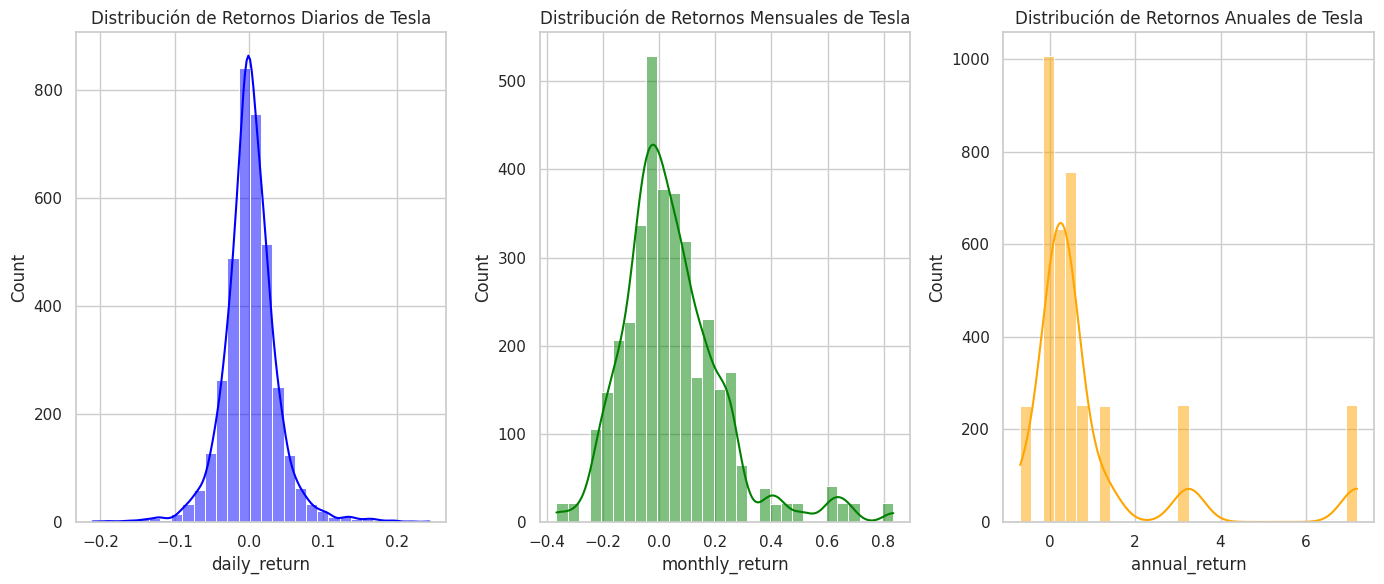

In [ ]:
# Graficar los histogramas de los rendimientos diarios, mensuales y anuales de Tesla
plt.figure(figsize=(14, 6))

# 1. Distribución de Retornos Diarios
plt.subplot(1, 3, 1)
sns.histplot(df_tsla['daily_return'], bins=30, kde=True, color='blue').set_title('Distribución de Retornos Diarios de Tesla')

# 2. Distribución de Retornos Mensuales
plt.subplot(1, 3, 2)
sns.histplot(df_tsla['monthly_return'], bins=30, kde=True, color='green').set_title('Distribución de Retornos Mensuales de Tesla')

# 3. Distribución de Retornos Anuales
plt.subplot(1, 3, 3)
sns.histplot(df_tsla['annual_return'], bins=30, kde=True, color='orange').set_title('Distribución de Retornos Anuales de Tesla')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

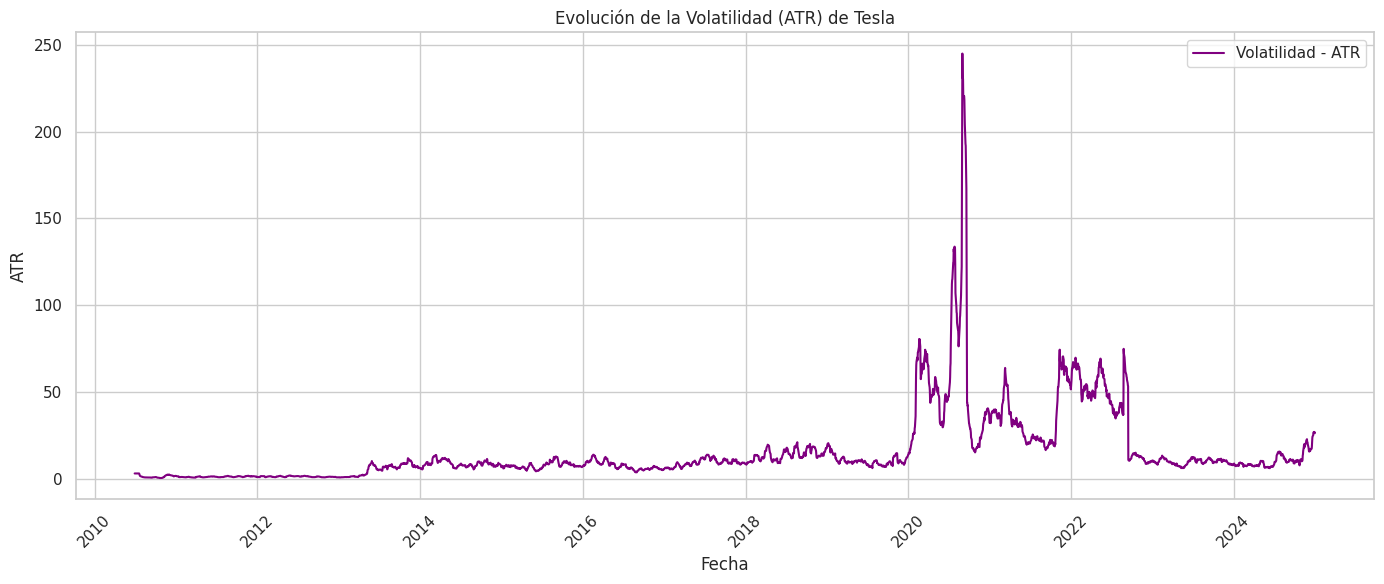

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna de fechas está en formato datetime
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

# Graficar la volatilidad con las fechas en formato correcto
plt.figure(figsize=(14, 6))
plt.plot(df_tsla['date'], df_tsla['ATR'], label='Volatilidad - ATR', color='purple')

# Configurar las etiquetas de las fechas
plt.title('Evolución de la Volatilidad (ATR) de Tesla')
plt.xlabel('Fecha')
plt.ylabel('ATR')

# Mejorar la visualización de las fechas
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()

<Figure size 1400x600 with 0 Axes>

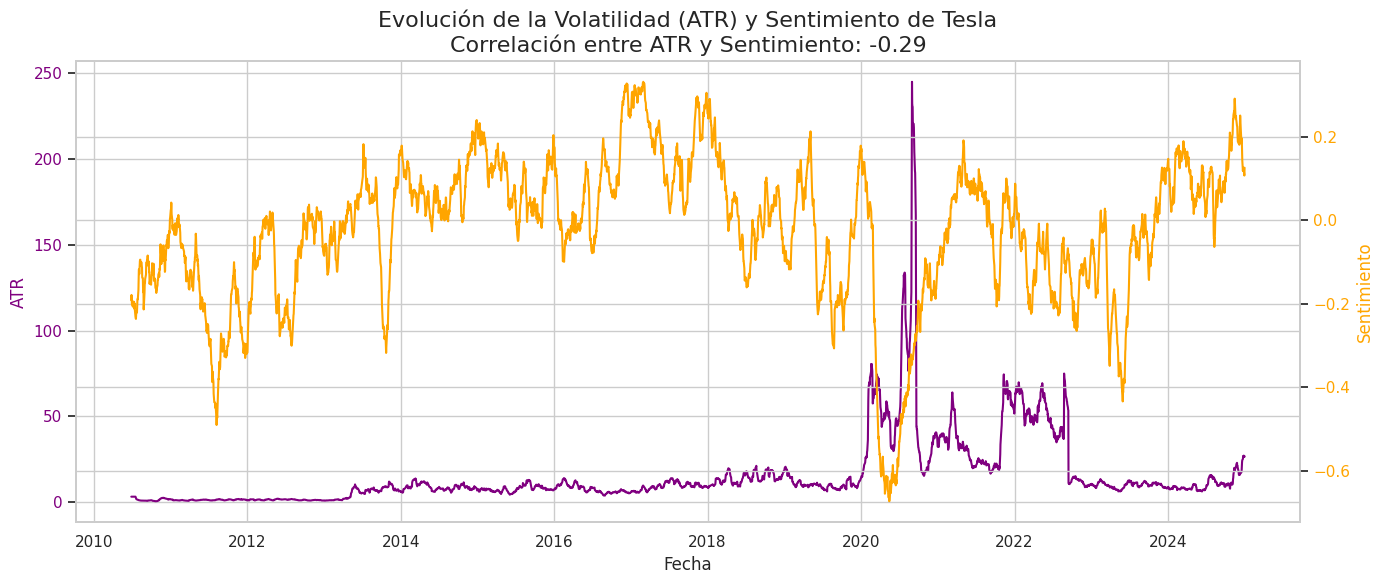

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna de fechas está en formato datetime
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

# Calcular la correlación entre ATR y el Sentimiento
correlation_atr_sentiment = df_tsla['ATR'].corr(df_tsla['News Sentiment'])

# Graficar la volatilidad (ATR) y el sentimiento
plt.figure(figsize=(14, 6))

# Crear dos gráficos en el mismo eje, uno para ATR y otro para Sentimiento
fig, ax1 = plt.subplots(figsize=(14, 6))

# Graficar la volatilidad
ax1.plot(df_tsla['date'], df_tsla['ATR'], color='purple', label='Volatilidad - ATR')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('ATR', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Crear un segundo eje para el sentimiento
ax2 = ax1.twinx()
ax2.plot(df_tsla['date'], df_tsla['News Sentiment'], color='orange', label='Sentimiento')
ax2.set_ylabel('Sentimiento', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título con la correlación entre ATR y Sentimiento
plt.title(f'Evolución de la Volatilidad (ATR) y Sentimiento de Tesla\n'
          f'Correlación entre ATR y Sentimiento: {correlation_atr_sentiment:.2f}', fontsize=16)

# Mejorar la visualización de las fechas
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<Figure size 1400x600 with 0 Axes>

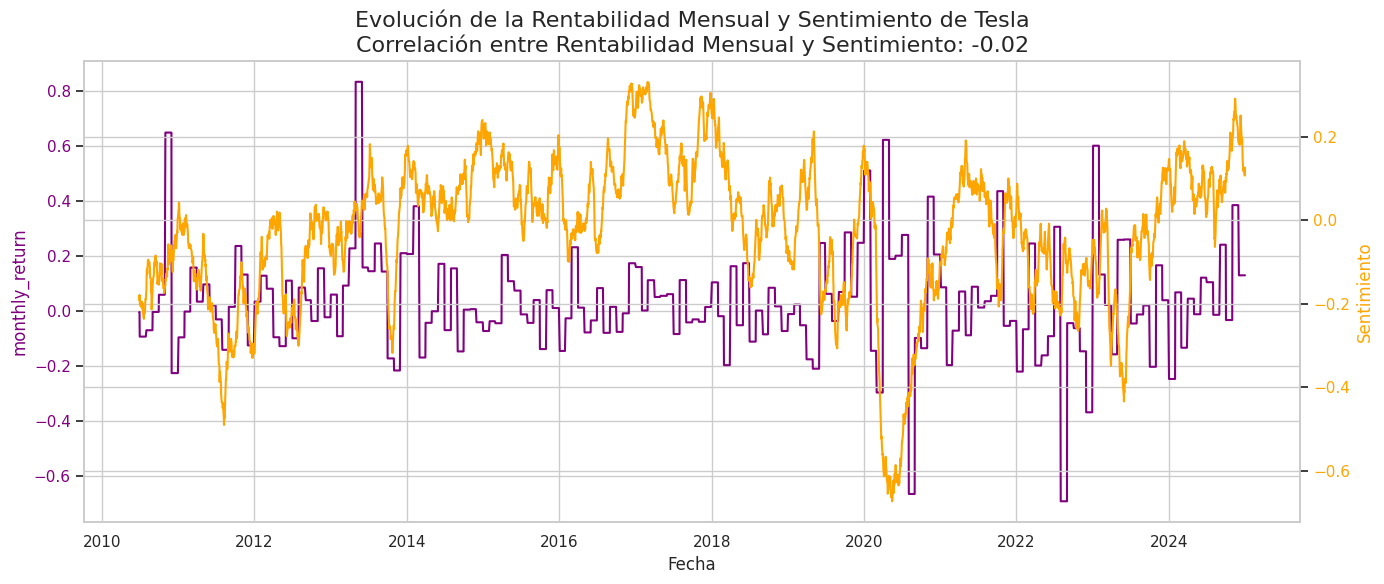

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna de fechas está en formato datetime
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

# Calcular la correlación entre ATR y el Sentimiento
correlation_atr_sentiment = df_tsla['monthly_return'].corr(df_tsla['News Sentiment'])

# Graficar la volatilidad (ATR) y el sentimiento
plt.figure(figsize=(14, 6))

# Crear dos gráficos en el mismo eje, uno para ATR y otro para Sentimiento
fig, ax1 = plt.subplots(figsize=(14, 6))

# Graficar la volatilidad
ax1.plot(df_tsla['date'], df_tsla['monthly_return'], color='purple', label='Volatilidad - ATR')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('monthly_return', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Crear un segundo eje para el sentimiento
ax2 = ax1.twinx()
ax2.plot(df_tsla['date'], df_tsla['News Sentiment'], color='orange', label='Sentimiento')
ax2.set_ylabel('Sentimiento', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título con la correlación entre ATR y Sentimiento
plt.title(f'Evolución de la Rentabilidad Mensual y Sentimiento de Tesla\n'
          f'Correlación entre Rentabilidad Mensual y Sentimiento: {correlation_atr_sentiment:.2f}', fontsize=16)

# Mejorar la visualización de las fechas
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

OBSERVAR QUE EL OPTIMISMO DEL MERCADO TAÁDA MAS EN SUBIR QUE EL PRECIO. ES CURIOSO PORQUE LA SITUACION NO SE ESTABIOLIA DEL TODO PERO LA ESPECULACUÓN EMPIEZA A CRECER RAPIDAMENTE.

In [ ]:
from google.colab import files

# Guardar last_prices como last_prices.csv
df_tsla.to_csv('/content/df_procesado_PLNT.csv', index=False)
files.download('/content/df_procesado_PLNT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ANÁLISIS EXPLORATORIO (ESTACIONALIDAD)

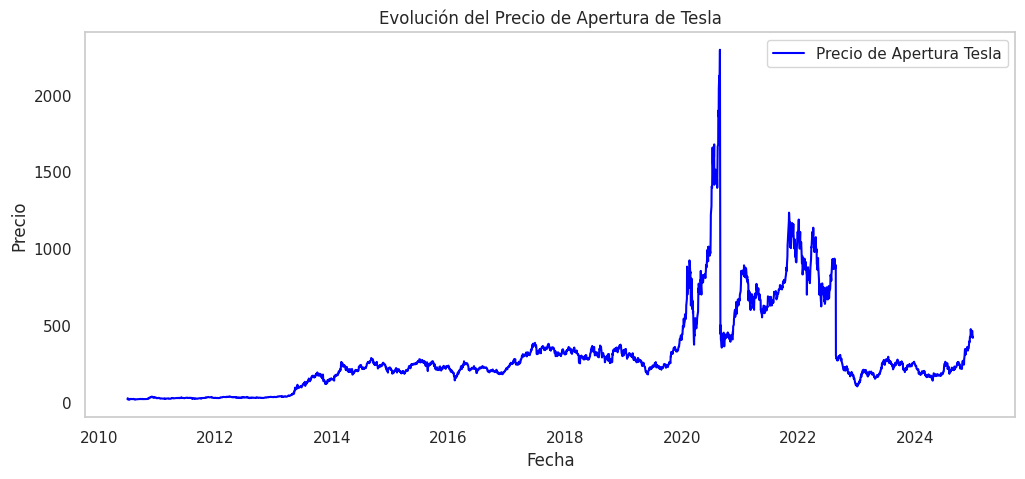

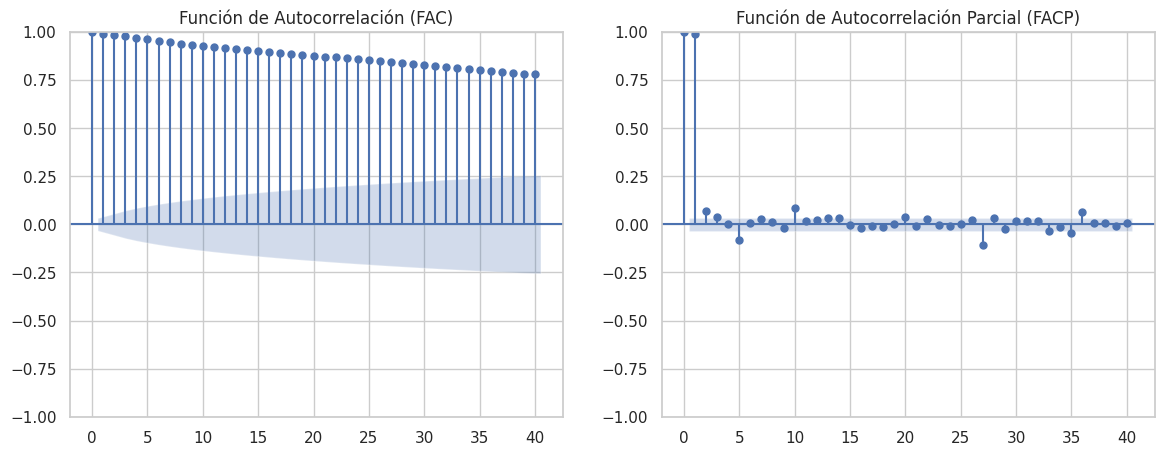


Resultados de la Prueba de Dickey-Fuller:
Estadístico ADF: -3.2469
Valor p: 0.0174
Número de rezagos usados: 28
Número de observaciones usadas: 3623
Valores críticos:
   1%: -3.4322
   5%: -2.8623
   10%: -2.5672

La serie es ESTACIONARIA (rechazamos H0 de raíz unitaria).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Asegurar que la fecha es un índice temporal
df_tsla['date'] = pd.to_datetime(df_tsla['date'])
df_tsla.set_index('date', inplace=True)  # Establecer la fecha como índice

# Extraer la serie del precio de apertura de Tesla
tsla_open = df_tsla['open']

# 1. Graficar la serie temporal original
plt.figure(figsize=(12, 5))
plt.plot(tsla_open, color='blue', label='Precio de Apertura Tesla')
plt.title('Evolución del Precio de Apertura de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

# 2. Graficar FAC y FACP
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(tsla_open, ax=axes[0], lags=40, title="Función de Autocorrelación (FAC)")
plot_pacf(tsla_open, ax=axes[1], lags=40, title="Función de Autocorrelación Parcial (FACP)")
plt.show()

# 3. Prueba de Dickey-Fuller
adf_test = adfuller(tsla_open, autolag='AIC')
adf_statistic, p_value, used_lag, n_obs, critical_values, _ = adf_test

# Mostrar resultados
print("\nResultados de la Prueba de Dickey-Fuller:")
print(f"Estadístico ADF: {adf_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Número de rezagos usados: {used_lag}")
print(f"Número de observaciones usadas: {n_obs}")
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.4f}")

# 4. Evaluar si la serie es estacionaria
if p_value < 0.05:
    print("\nLa serie es ESTACIONARIA (rechazamos H0 de raíz unitaria).")
else:
    print("\nLa serie NO es ESTACIONARIA (no podemos rechazar H0 de raíz unitaria).")


In [ ]:
# Ver las columnas del DataFrame df_tsla
print(df_tsla.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'News Sentiment', 'open_APPL',
       'open_AMZN', 'open_AVGO', 'open_BRK.B', 'open_GOOGL', 'open_GOOG',
       'open_META', 'open_MSFT', 'open_NVDA', 'open_SPY', 'moving_average',
       'RSI', 'ema_short', 'ema_long', 'MACD', 'MACD_signal', 'bollinger_mid',
       'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'volatility',
       'ATR', 'daily_return', 'monthly_return', 'annual_return'],
      dtype='object')


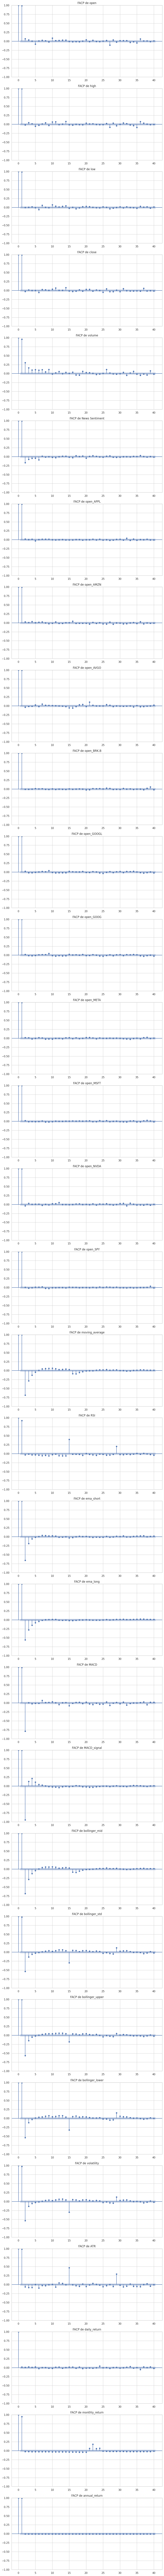

Variables estacionarias:
['open', 'high', 'low', 'close', 'News Sentiment', 'open_NVDA', 'moving_average', 'RSI', 'ema_short', 'MACD', 'MACD_signal', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'volatility', 'ATR', 'daily_return', 'monthly_return']

Variables no estacionarias:
['volume', 'open_APPL', 'open_AMZN', 'open_AVGO', 'open_BRK.B', 'open_GOOGL', 'open_GOOG', 'open_META', 'open_MSFT', 'open_SPY', 'ema_long', 'annual_return']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para realizar el test de Dickey-Fuller y graficar raíces unitarias
def dickey_fuller_test(df):
    stationary = []  # Lista para almacenar variables estacionarias
    non_stationary = []  # Lista para almacenar variables no estacionarias

    fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 5 * len(df.columns)))  # Subgráficos

    # Iterar sobre todas las columnas del DataFrame
    for i, column in enumerate(df.columns):
        series = df[column].dropna()  # Eliminar valores NaN
        adf_test = adfuller(series, autolag='AIC')
        adf_statistic, p_value, _, _, critical_values, _ = adf_test

        # Evaluar si la serie es estacionaria
        if p_value < 0.05:
            stationary.append(column)
        else:
            non_stationary.append(column)

        # Graficar la FACP (indica raíces unitarias si los valores no caen dentro del IC)
        ax = axes[i] if len(df.columns) > 1 else axes  # Ajuste para un solo gráfico
        plot_pacf(series, ax=ax, lags=40, title=f"FACP de {column}")

    plt.tight_layout()
    plt.show()  # Mostrar todas las gráficas juntas

    return stationary, non_stationary

# Realizar el test de Dickey-Fuller sobre todas las variables del DataFrame de Tesla
stationary, non_stationary = dickey_fuller_test(df_tsla)

# Mostrar el resumen de las variables estacionarias y no estacionarias
print("Variables estacionarias:")
print(stationary)
print("\nVariables no estacionarias:")
print(non_stationary)

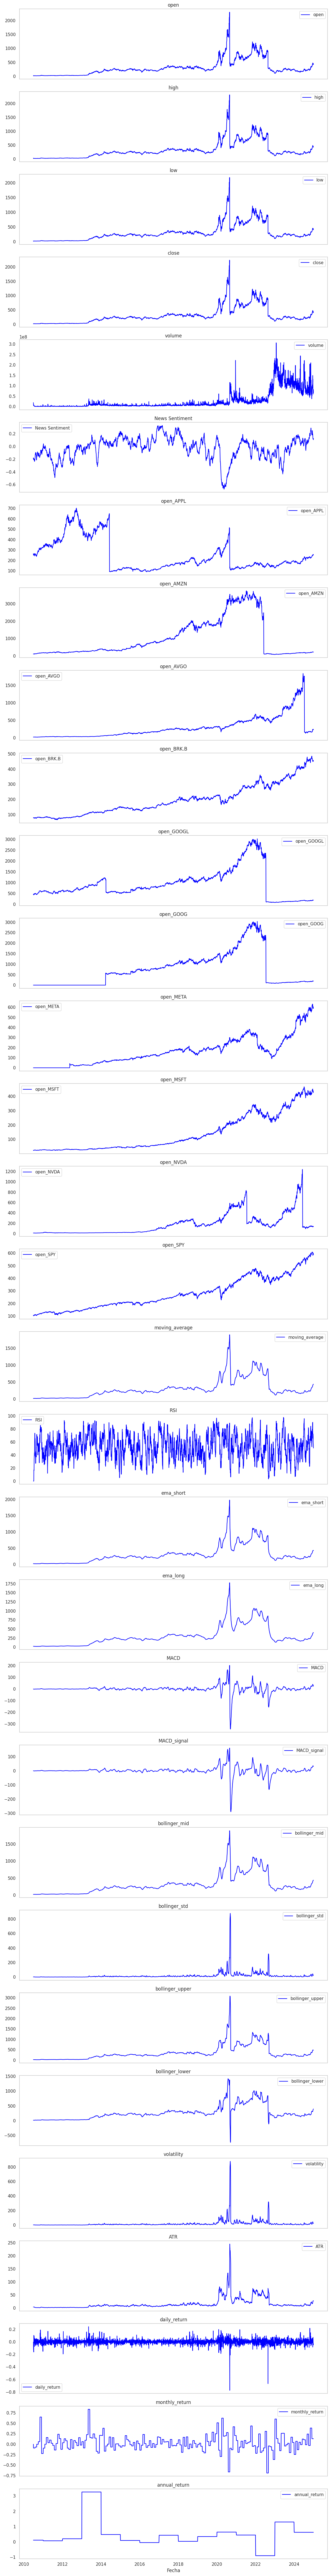

In [ ]:
import matplotlib.pyplot as plt

# Configuración de la figura con subgráficos
num_variables = len(df_tsla.columns)
fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(12, 3 * num_variables), sharex=True)

# Si hay solo una variable, hacer que axes sea iterable
if num_variables == 1:
    axes = [axes]

# Graficar cada variable en un subplot
for i, column in enumerate(df_tsla.columns):
    axes[i].plot(df_tsla.index, df_tsla[column], label=column, color='blue')
    axes[i].set_title(column)
    axes[i].grid()
    axes[i].legend()

# Etiqueta del eje x solo en el último gráfico
axes[-1].set_xlabel("Fecha")

plt.tight_layout()
plt.show()

Aplicando solo diferenciación para open_GOOG (valores <= 0 detectados)
Aplicando solo diferenciación para open_META (valores <= 0 detectados)
Aplicando solo diferenciación para annual_return (valores <= 0 detectados)


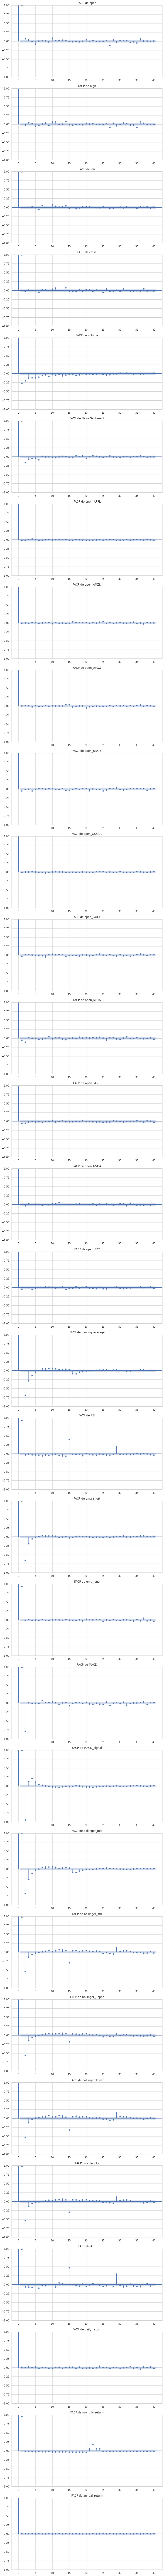


Después de la transformación:
Variables estacionarias:
['open', 'high', 'low', 'close', 'volume', 'News Sentiment', 'open_APPL', 'open_AMZN', 'open_AVGO', 'open_BRK.B', 'open_GOOGL', 'open_GOOG', 'open_META', 'open_MSFT', 'open_NVDA', 'open_SPY', 'moving_average', 'RSI', 'ema_short', 'ema_long', 'MACD', 'MACD_signal', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'volatility', 'ATR', 'daily_return', 'monthly_return', 'annual_return']

Variables que siguen no estacionarias:
[]


In [ ]:
# Crear un nuevo DataFrame para las transformaciones
df_log = df_tsla.copy()

# Aplicar transformación logarítmica y diferenciación a las variables no estacionarias
for column in non_stationary:
    if (df_log[column] <= 0).any():
        print(f"Aplicando solo diferenciación para {column} (valores <= 0 detectados)")
        df_log[column] = df_log[column].diff()  # Solo diferenciación
    else:
        df_log[column] = np.log(df_log[column]).diff()  # Log + diferenciación

# Eliminar la primera fila que tendrá NaN debido a la diferenciación
df_log = df_log.dropna()

# Volver a realizar el test de estacionariedad
stationary_log, non_stationary_log = dickey_fuller_test(df_log)

print("\nDespués de la transformación:")
print("Variables estacionarias:")
print(stationary_log)
print("\nVariables que siguen no estacionarias:")
print(non_stationary_log)

# Verificar la mejora con un ejemplo específico (por ejemplo, el precio 'open')
adf_test_original = adfuller(df_tsla['open'].dropna(), autolag='AIC')
adf_test_transformed = adfuller(df_log['open'].dropna(), autolag='AIC')



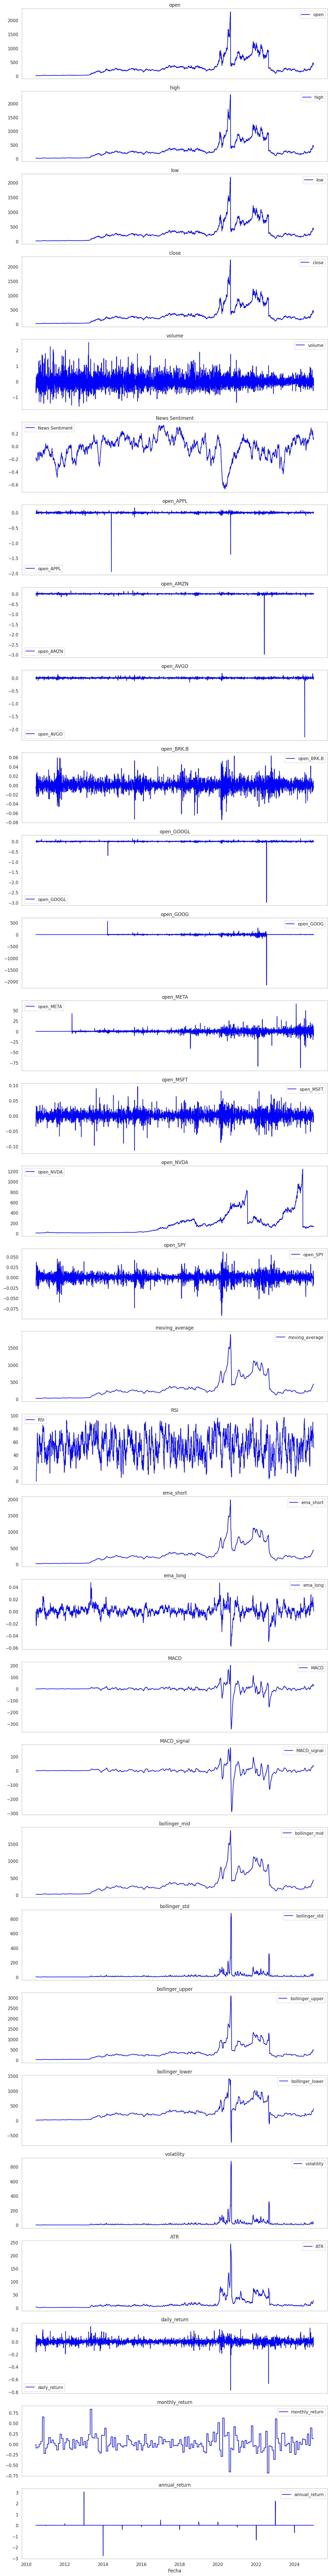

In [ ]:
import matplotlib.pyplot as plt

# Configuración de la figura con subgráficos
num_variables = len(df_log.columns)
fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(12, 3 * num_variables), sharex=True)

# Si hay solo una variable, hacer que axes sea iterable
if num_variables == 1:
    axes = [axes]

# Graficar cada variable en un subplot
for i, column in enumerate(df_log.columns):
    axes[i].plot(df_log.index, df_log[column], label=column, color='blue')
    axes[i].set_title(column)
    axes[i].grid()
    axes[i].legend()

# Etiqueta del eje x solo en el último gráfico
axes[-1].set_xlabel("Fecha")

plt.tight_layout()
plt.show()

In [ ]:
# prompt: quiero ver las primeras entradas de df_log

print(df_log.head())


             open     high    low  close    volume  News Sentiment  open_APPL  \
date                                                                            
2010-06-30  25.79  30.4192  23.30  23.83 -0.087904       -0.178868  -0.028458   
2010-07-01  25.00  25.9200  20.27  21.96 -0.737735       -0.184704  -0.009432   
2010-07-02  23.00  23.1000  18.71  19.20 -0.469410       -0.201990  -0.015096   
2010-07-06  20.00  20.0000  15.83  16.11  0.289699       -0.206325   0.002034   
2010-07-07  16.40  16.6300  14.98  15.80  0.007949       -0.207097  -0.002034   

            open_AMZN  open_AVGO  open_BRK.B  ...  MACD_signal  bollinger_mid  \
date                                          ...                               
2010-06-30  -0.068342  -0.018497   -0.006246  ...    -0.000957      19.508571   
2010-07-01   0.002943   0.020375   -0.003012  ...    -0.032297      19.508571   
2010-07-02   0.018379   0.007477   -0.006431  ...    -0.124997      19.508571   
2010-07-06  -0.002437   0.0

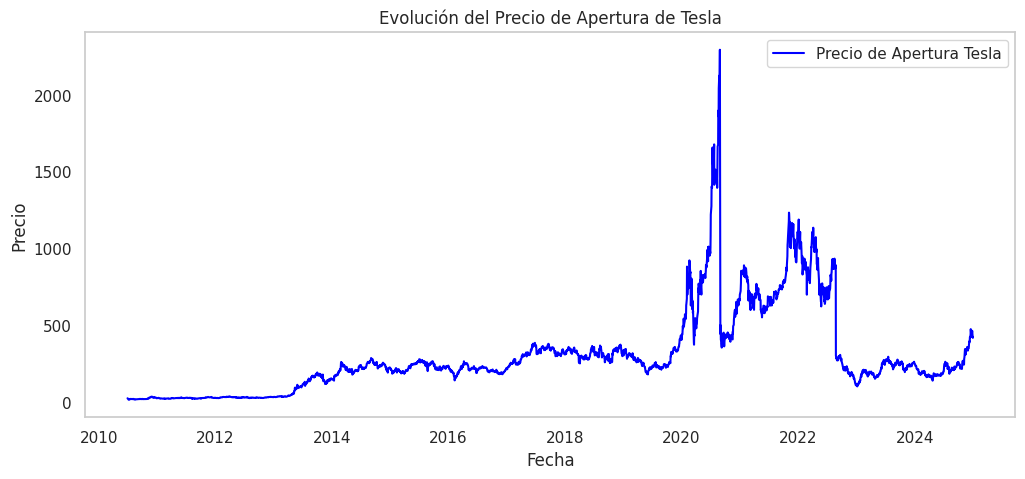

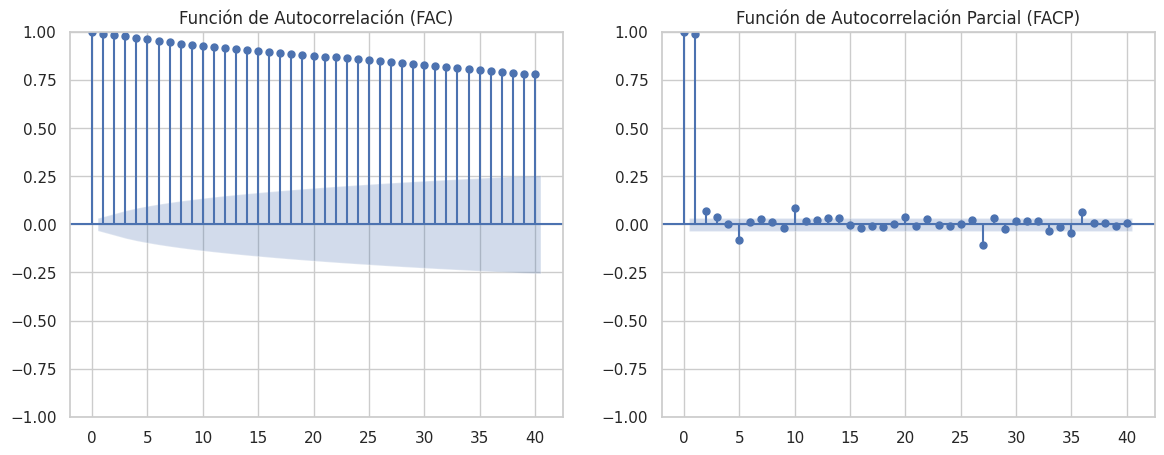


Resultados de la Prueba de Dickey-Fuller:
Estadístico ADF: -3.2472
Valor p: 0.0174
Número de rezagos usados: 28
Número de observaciones usadas: 3622
Valores críticos:
   1%: -3.4322
   5%: -2.8623
   10%: -2.5672

La serie es ESTACIONARIA (rechazamos H0 de raíz unitaria).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Revertir la conversión de 'date' a índice y devolverla como una variable en el DataFrame
df_log.reset_index(inplace=True)
# Asegurar que la fecha es un índice temporal
#df_log['date'] = pd.to_datetime(df_log['date'])
df_log.set_index('date', inplace=True)  # Establecer la fecha como índice

# Extraer la serie del precio de apertura de Tesla
log_open = df_log['open']

# 1. Graficar la serie temporal original
plt.figure(figsize=(12, 5))
plt.plot(log_open, color='blue', label='Precio de Apertura Tesla')
plt.title('Evolución del Precio de Apertura de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

# 2. Graficar FAC y FACP
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(log_open, ax=axes[0], lags=40, title="Función de Autocorrelación (FAC)")
plot_pacf(log_open, ax=axes[1], lags=40, title="Función de Autocorrelación Parcial (FACP)")
plt.show()

# 3. Prueba de Dickey-Fuller
adf_test = adfuller(log_open, autolag='AIC')
adf_statistic, p_value, used_lag, n_obs, critical_values, _ = adf_test

# Mostrar resultados
print("\nResultados de la Prueba de Dickey-Fuller:")
print(f"Estadístico ADF: {adf_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Número de rezagos usados: {used_lag}")
print(f"Número de observaciones usadas: {n_obs}")
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.4f}")

# 4. Evaluar si la serie es estacionaria
if p_value < 0.05:
    print("\nLa serie es ESTACIONARIA (rechazamos H0 de raíz unitaria).")
else:
    print("\nLa serie NO es ESTACIONARIA (no podemos rechazar H0 de raíz unitaria).")

In [ ]:
#Importante:
# Guardar el último precio para luego poder hacer la transformación inversa
last_prices_tsla = df_tsla.iloc[-1][non_stationary]  # Guarda el último precio de las variables originalmente no estacionarias


#depues de predecir: # Después de entrenar y predecir:
#predicted_returns = modelo.predict(X_test)

# Convertir de vuelta a precios
#last_price = df_spy['open'].iloc[-1]
#predicted_prices = last_price * np.exp(predicted_returns)#

In [ ]:
from google.colab import files

# Guardar df_log como df_procesado_sp.csv
df_log_tsla.to_csv('/content/df_procesado_tsla.csv', index=False)
files.download('/content/df_procesado_tsla.csv')

# Guardar last_prices como last_prices.csv
last_prices_tsla.to_csv('/content/last_prices.csv', index=False)
files.download('/content/last_prices.csv')

In [ ]:
FINALMENTE, MENCIONAR QUE NORMALIZAMOS UNA VERSIÓN Y OTRA NO.